# Proyek Pembuatan Aplikasi NLP Bahasa Indonesia Berdasar Metrik T.E.R.A

#### Pengembangan Fitur Keterbacaan Teks Bahasa Indonesia melalui Kombinasi Kajian Linguistik dengan Pendekatan Natural Language Processing

- Status proyek : RAHASIA NEGARA (DALAM STATUS RISET)
- Timeline      : gara gara salah baca, timeline proyek tak sengaja terlalu maju 2 tahun 🦆🦆🦆🦆🦆🦆🦆🦆🦆🦆🦆


**Tujuan Proyek**
1. Mencari tahu apakah mungkin untuk membuat model NLP yang dapat memprediksi skor metrik keterbacaan menggunakan kaidah T.E.R.A
2. Mengidentifikasi faktor-faktor yang mempengaruhi keterbacaan teks
3. Mengumpulkan data teks dari berbagai sumber
4. Membangun model NLP untuk analisis keterbacaan
5. Mengukur tingkat keterbacaan teks abstrak skripsi menggunakan metrik keterbacaan (misalnya Flesch Reading Ease atau formula lokal adaptif).
6. Menganalisis pengaruh struktur kalimat, panjang kata, dan kosakata terhadap keterbacaan.
7. Menggunakan model untuk memprediksi keterbacaan teks baru
8. Membandingkan hasil keterbacaan antara teks asli dengan hasil parafrase berbasis NLP.
9. Mengimplementasikan sistem parafrase otomatis berbasis NLP.
10. Menyediakan fallback logic agar hasil tetap utuh jika model gagal.
11. Analisis data dan visualisasi keakuratan model

**Manfaat Penelitian**
1. Memberikan panduan objektif dalam penyusunan abstrak ilmiah yang efektif.
2. Mendukung pengembangan sistem otomatis untuk peningkatan keterbacaan teks (text simplification).
3. Menjadi dasar bagi integrasi teknologi NLP dalam bidang penulisan akademik di Indonesia.
4. Menghasilkan pipeline otomatis untuk simplifikasi bahasa akademik.
5. Meningkatkan aksesibilitas dokumen ilmiah bagi pembaca lintas bidang.

## Data Preparation

Data preparation adalah langkah awal dan krusial dalam proses pengolahan data baik untuk analisis, machine learning, maupun visualisasi. Tujuannya adalah memastikan data yang digunakan bersih, relevan, dan siap diproses.

### Data Collection

Data collection adalah proses mengumpulkan informasi atau data mentah dari berbagai sumber untuk dianalisis, diproses, atau digunakan dalam pengambilan keputusan. Ini adalah langkah pertama dalam data preparation, dan sangat menentukan kualitas hasil akhir dari analisis atau model yang dibangun.

Tujuan Data Collection
- Mendapatkan data yang relevan untuk menjawab pertanyaan riset atau kebutuhan bisnis
- Menyediakan bahan mentah untuk proses cleaning, transformasi, dan analisis
- Menyusun dataset yang bisa digunakan untuk machine learning, statistik, atau visualisasi

Teknik Data Collection pada riset ini adalah dengan menggunakan Web Scraping, Teknik Web Scraping adalah metode pengumpulan data dari website secara otomatis menggunakan program atau script. Ini bagian dari data collection dalam data preparation, terutama saat data tidak tersedia dalam bentuk API atau file unduhan. Web scraping meniru perilaku manusia saat mengakses halaman web, tapi dilakukan oleh bot atau script. Tujuannya mengambil informasi yang ditampilkan di halaman web dan menyimpannya dalam format terstruktur (CSV, JSON, database, dll).

Kode Python dibawah ini merupakan skrip web scraping untuk mengambil data dari Repositori UNTIDAR (Universitas Tidar), lalu menyimpannya dalam format CSV. Fokus utamanya adalah mengambil abstrak dari dokumen, memecahnya menjadi kalimat per baris, dan menyertakan metadata seperti judul, penulis, fakultas, dan prodi supaya didapat data mentah untuk proses selanjutnya.

Regex (?<=[.!?])\s+ akan diterapkan untuk NLP preprocessing.


In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import re

# Konfigurasi , base URL dan nama file output
BASE_URL = "https://repositori.untidar.ac.id/index.php?p=show_detail&id={}"
OUTPUT_FILE = "dataset/untidar_scrape_perkalimat.csv"

# Header CSV data mentah , data meliputi kalimat pada abstrak, judul, penulis, fakultas, prodi
fields = ["No", "Kalimat", "Judul", "Penulis", "Fakultas", "Prodi"]

results = []


# Mulai scraping dari ID 15000 hingga 20000
for doc_id in range(15000, 20000):
    url = BASE_URL.format(doc_id)
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
    except requests.RequestException as e:
        print(f"[SKIP] ID {doc_id} - error: {e}")
        continue

    soup = BeautifulSoup(response.text, "html.parser")

    try:
        judul = soup.select_one(
            "body div.result-search.pb-5 section.container.mt-8 div div div.flex-1.p-0.px-md-4 blockquote h4"
        ).get_text(strip=True)
    except AttributeError:
        judul = None

    try:
        penulis = soup.select_one(
            "body div.result-search.pb-5 section.container.mt-8 div div div.flex-1.p-0.px-md-4 blockquote footer a"
        ).get_text(strip=True)
    except AttributeError:
        penulis = None

    try:
        fakultas_prodi = soup.select_one(
            "body div.result-search.pb-5 section.container.mt-8 div div div.flex-1.p-0.px-md-4 dl dd:nth-child(24) div"
        ).get_text(strip=True)
        if "-" in fakultas_prodi:
            fakultas, prodi = [x.strip() for x in fakultas_prodi.split("-", 1)]
        else:
            fakultas, prodi = fakultas_prodi, None
    except AttributeError:
        fakultas, prodi = None, None

    try:
        abstrak = soup.select_one(
            "body div.result-search.pb-5 section.container.mt-8 div div div.flex-1.p-0.px-md-4 p.text-grey-darker"
        ).get_text(" ", strip=True)
    except AttributeError:
        abstrak = None

    # Bagian untuk memecah abstrak menjadi kalimat-kalimat
    if abstrak:
        kalimat_list = [kal.strip() for kal in re.split(r'(?<=[.!?])\s+', abstrak) if kal.strip()] # regex untuk memecah kalimat berdasarkan tanda baca . ! ?
        for idx, kalimat in enumerate(kalimat_list, start=1):
            results.append([idx, kalimat, judul, penulis, fakultas, prodi])
        print(f"[OK] ID {doc_id} - {len(kalimat_list)} kalimat diambil")
    else:
        print(f"[EMPTY] ID {doc_id} tidak ada abstrak")

with open(OUTPUT_FILE, mode="w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(fields)
    writer.writerows(results)

print(f"Scraping selesai. Data tersimpan di {OUTPUT_FILE}")


[OK] ID 19990 - 12 kalimat diambil
[OK] ID 19991 - 10 kalimat diambil
[OK] ID 19992 - 13 kalimat diambil
[OK] ID 19993 - 15 kalimat diambil
[OK] ID 19994 - 9 kalimat diambil
[OK] ID 19995 - 14 kalimat diambil
[OK] ID 19996 - 26 kalimat diambil
[OK] ID 19997 - 26 kalimat diambil
[OK] ID 19998 - 12 kalimat diambil
[OK] ID 19999 - 20 kalimat diambil
Scraping selesai. Data tersimpan di dataset/untidar_scrape_perkalimat.csv


### Data Cleaning

Data cleaning (pembersihan data) adalah proses penting dalam data preparation yang bertujuan untuk memastikan bahwa data yang digunakan dalam analisis atau pemodelan adalah akurat, konsisten, dan bebas dari kesalahan. Tanpa data yang bersih, hasil analisis bisa menyesatkan, model machine learning bisa bias, dan insight yang diambil bisa salah arah.

Tujuan Utama Data Cleaning
- Menghilangkan noise dan error dari data mentah
- Menstandarisasi format agar data bisa diproses otomatis
- Meningkatkan kualitas dan keandalan hasil analisi


Kode dibawah ini merupakan modul pembersihan data (data cleaning) yang rapi dan modular , dirancang untuk membersihkan hasil scraping dari Repositori UNTIDAR per kalimat. Ini bukan sekadar cleaning biasa, tapi juga melakukan normalisasi, parsing, deduplikasi, dan formatting proper-case ala Bahasa Indonesia.

Tujuan Utama Skrip
- Membersihkan karakter rusak (mojibake)
- Menormalkan format teks (judul, penulis, jurusan)
- Memecah dan mengekstrak jurusan dari gabungan prodi/fakultas
- Menghapus duplikasi (baik exact maupun fuzzy)
- Menyimpan hasil bersih ke file CSV baru



In [16]:

import os
import re
from pathlib import Path
from typing import Optional, List, Tuple

import pandas as pd


# Konfigurasi input/output
# Gunakan forward slashes agar portable lintas OS
INPUT_CSV_PATH = "dataset/untidar_scrape_perkalimat.csv"
OUTPUT_SUFFIX = "_clean"
DELIMITER_OUT = ","
ENCODING_OUT = "utf-8"
ENCODING_IN = "utf-8"
PRIMARY_KEY_EXACT = ["Kalimat", "Judul", "Penulis"]
 
# fix mojibake & normalisasi diperlukan untuk dedup fuzzy berbasis kalimat
def fix_mojibake(text: Optional[str]) -> Optional[str]:
    if text is None or (isinstance(text, float) and pd.isna(text)):
        return None
    s = str(text)
    repl = {
        "â€œ": '"', "â€": '"', "â€˜": "'", "â€™": "'",
        "â€“": "-", "â€”": "-", "â€¢": "*", "â€¦": "...",
        "Â ": " ", "Â": "", "Ã—": "×",
    }
    for bad, good in repl.items():
        s = s.replace(bad, good)
    s = s.replace("“", '"').replace("”", '"').replace("’", "'").replace("‘", "'")
    # collapse whitespace
    s = re.sub(r"\s+", " ", s).strip()
    return s

def clean_quotes(text: Optional[str]) -> Optional[str]:
    """
    Hapus semua jenis tanda petik dari teks (ASCII + smart quotes),
    sekaligus normalisasi spasinya.
    """
    if text is None or (isinstance(text, float) and pd.isna(text)):
        return None
    s = str(text)

    # hapus semua quote characters
    s = re.sub(r"[\'\"“”‘’`´]", "", s)

    # collapse dan strip
    s = re.sub(r"\s+", " ", s).strip()
    return s

# bagian untuk menghilangkan kalimat sangat pendek (misal "Ok", "Ya", "No")
def is_too_short(text: Optional[str], min_len: int = 5) -> bool:
    if text is None or pd.isna(text):
        return True
    s = fix_mojibake(text)
    return len(s) < min_len

# key untuk dedup fuzzy: kalimat lower-case, tanpa tanda baca, spasi dirapikan
def kalimat_key(text: Optional[str]) -> Optional[str]:
    if text is None or pd.isna(text):
        return None
    s = fix_mojibake(text).lower()
    s = _PUNCT_RE.sub(" ", s)
    s = _SPACES_RE.sub(" ", s).strip()
    return s

# path resolver (untuk input relatif)
def resolve_input_path(rel_path: str, depth: int = 5) -> Path:
    """
    Cari file berdasarkan relative path dari CWD dan beberapa parentnya.
    Fallback: glob mencari path yang berakhir dengan rel_path.
    """
    tried: List[Path] = []
    norm_rel = Path(os.path.normpath(rel_path))

    # 1) Coba apa adanya relatif ke masing-masing parent CWD
    cwd = Path.cwd()
    for base in [cwd, *list(cwd.parents)[:depth]]:
        cand = (base / norm_rel).resolve()
        tried.append(cand)
        if cand.exists():
            return cand

    # 2) Jika masih gagal, glob di beberapa parent (dibatasi agar aman)
    pattern_name = norm_rel.name  # e.g., rawdata.csv
    for base in [cwd, *list(cwd.parents)[:depth]]:
        for hit in base.rglob(pattern_name):
            try_path = hit.resolve()
            # Kenapa: pastikan struktur foldernya cocok di akhir
            if tuple(try_path.parts[-len(norm_rel.parts):]) == tuple(norm_rel.parts):
                return try_path

    # 3) Gagal total -> error dengan info debug
    msg = [
        f"Tidak menemukan file: '{rel_path}'",
        f"CWD: {cwd}",
        "Jalur yang dicoba:"
    ] + [f" - {p}" for p in tried]
    raise FileNotFoundError("\n".join(msg))

# Parser PRODI/FAKULTAS gabungan spesial
def parse_prodi_fakultas(value: Optional[str]) -> Tuple[Optional[str], Optional[str]]:
    """
    Ekstrak (jurusan, fakultas) dari pola:
      'PRODI_<jurusan>FAKULTAS_<fakultas>'  (underscore sebagai spasi)
    Toleran terhadap spasi/underscore/case.
    """
    if value is None or pd.isna(value):
        return (pd.NA, pd.NA)
    v = fix_mojibake(str(value))
    if not v:
        return (pd.NA, pd.NA)

    # Normalisasi untuk menghilangkan koma di ujung, spasi → underscore untuk memudahkan regex
    v = v.strip().rstrip(",").replace('"', '')
    v_us = re.sub(r"\s+", "_", v)

    # Ambil bagian setelah PRODI_ dan sebelum FAKULTAS (jika ada)
    m = re.search(r"(?i)prodi[_:\-\s]*([A-Z0-9_ ]+?)(?:_?fakultas\b|$)", v_us)
    jur = m.group(1) if m else None

    # Ambil fakultas jika ada pada bagian akhir
    m2 = re.search(r"(?i)fakultas[_:\-\s]*([A-Z0-9_ ]+)$", v_us)
    fak = m2.group(1) if m2 else None

    def clean(tok: Optional[str]) -> Optional[str]:
        if not tok:
            return pd.NA
        t = tok.strip(" _-")
        t = re.sub(r"_+", " ", t)
        t = re.sub(r"\s+", " ", t).strip()
        return t if t else pd.NA

    return (clean(jur), clean(fak))

# Proper-Case (ID) ala Title Case
# Sederhana, tidak 100% sesuai EYD tapi cukup untuk kasus ini
SMALL_WORDS = {
    "dan", "di", "ke", "yang", "dari", "pada", "untuk", "oleh", "atau", "dengan",
    "serta", "dalam", "tentang", "terhadap", "para", "antara", "sebagai", "tiap",
    "setiap", "hingga", "sejak", "sampai", "karena", "agar", "supaya", "meskipun",
    "walaupun", "jika", "bila", "apabila", "sebab", "namun", "tetapi", "melainkan",
    "bahwa", "sekalipun", "sedangkan", "sementara", "adalah", "ialah", "itu", "ini",
    "termasuk", "kecuali", "tanpa", "seperti", "sebagaimana", "oleh karena itu",
    "akan tetapi", "dengan demikian", "di samping itu", "di sisi lain", "oleh sebab itu"
}
AKRONIM_KEEP = {"FKIP","FK","FEB","FISIP","FIB","FMIPA","FT","FIP","FIK","S1","S2","S3","SD","SMP","SMA","UMKM","AI","IT","UN","UK","USA"}
ROMAN = {"I","II","III","IV","V","VI","VII","VIII","IX","X"}

# Proper-case function
def proper_case_id(text: Optional[str]) -> Optional[str]:
    """Title Case ala ID; jaga akronim/roman numerals. Simpel tapi cukup untuk kasus ini."""
    if text is None or pd.isna(text):
        return text
    s = fix_mojibake(str(text))
    if not s:
        return s

    # ganti underscore -> spasi (untuk kasus jurusan/fakultas)
    s = re.sub(r"_+", " ", s)
    words = re.split(r"(\s+)", s)  # keep separators
    out = []
    pos = 0
    for w in words:
        pos += 1
        if w.isspace():
            out.append(w)
            continue
        raw = w

        # jika semua huruf & panjang>1 dan ada di whitelist akronim/roman
        u = raw.upper()
        if u in AKRONIM_KEEP or u in ROMAN:
            out.append(u)
            continue

        # Jika 2+ huruf kapital berturut (mungkin akronim tak dikenal) -> biarkan
        if re.fullmatch(r"[A-Z]{2,}\.?$", raw):
            out.append(raw)
            continue

        # Default title-case
        lower = raw.lower()
        if lower in SMALL_WORDS and len(out) > 0:
            out.append(lower)
        else:
            out.append(lower.capitalize())

    # Post-fix beberapa tanda baca khas ID
    res = "".join(out)
    res = re.sub(r"\s+([,:;.?!)])", r"\1", res)
    res = re.sub(r"([(])\s+", r"\1", res)
    return res.strip()

# Main
def main() -> None:
    src = Path(INPUT_CSV_PATH)
    if not src.exists():
        raise FileNotFoundError(f"File input tidak ditemukan: {src}")

    # Load
    df = pd.read_csv(src, encoding=ENCODING_IN)

    # Header → Title Case konsisten
    df.columns = [str(c).strip().title() for c in df.columns]

    # Pastikan kolom utama
    for c in ("No", "Kalimat", "Judul", "Penulis"):
        if c not in df.columns:
            df[c] = pd.NA

    # Derivasi Jurusan
    # Sumber utama: kolom Prodi jika terisi; jika kosong, parse dari Fakultas (gabungan)
    jur_from_prodi = df["Prodi"].map(lambda x: fix_mojibake(x) if "Prodi" in df.columns else pd.NA) if "Prodi" in df.columns else pd.Series(pd.NA, index=df.index)
    jur_from_prodi = jur_from_prodi.where(jur_from_prodi.fillna("").str.strip().ne(""), other=pd.NA)

    if "Fakultas" in df.columns:
        parsed = df["Fakultas"].apply(parse_prodi_fakultas)
        jur_parsed = parsed.map(lambda t: t[0])
        fak_parsed = parsed.map(lambda t: t[1])
    else:
        jur_parsed = pd.Series(pd.NA, index=df.index)
        fak_parsed = pd.Series(pd.NA, index=df.index)

    df["Jurusan"] = jur_from_prodi.combine_first(jur_parsed)

    # Optional: jika ingin simpan fakultas hasil parse (tak dipakai di output)
    if "Fakultas" in df.columns:
        df["FakultasNama"] = fak_parsed

    # Bersih teks & Proper Case
    for c in ["Kalimat", "Judul", "Penulis", "Jurusan"]:
        df[c] = df[c].map(lambda x: clean_quotes(fix_mojibake(x)))

    # proper-case; untuk Kalimat biarkan apa adanya (jangan title-case)
    df["Judul"] = df["Judul"].map(proper_case_id)
    df["Penulis"] = df["Penulis"].map(proper_case_id)
    df["Jurusan"] = df["Jurusan"].map(proper_case_id)

    # Buang baris tanpa Kalimat
    df = df[df["Kalimat"].fillna("").astype(str).str.strip().ne("")].copy()

    # Dedup 1: exact
    before = len(df)
    df = df.drop_duplicates(subset=PRIMARY_KEY_EXACT, keep="first")
    d1 = before - len(df)

    # Dedup 2: normalized Kalimat
    df["Kalimatkey"] = df["Kalimat"].map(kalimat_key)
    before2 = len(df)
    df = df.drop_duplicates(subset=["Kalimatkey", "Judul", "Penulis"], keep="first")
    d2 = before2 - len(df)

    # Simpan hasil akhir dengan format kolom yang diinginkan
    final_cols = ["Kalimat", "Judul", "Penulis", "Jurusan"]
    df_final = df[final_cols].reset_index(drop=True)

    out_path = src.with_name(src.stem + OUTPUT_SUFFIX + ".csv")
    out_path.parent.mkdir(parents=True, exist_ok=True)
    df_final.to_csv(
        out_path, index=False, encoding=ENCODING_OUT,
        sep=DELIMITER_OUT, lineterminator="\n", na_rep=""
    )

    print(f"Input : {src}")
    print(f"Output : {out_path}")

    # Statistik tambahan
    def _pct(a: int, b: int) -> float:
        return (a / b * 100.0) if b else 0.0

    rows_before = before
    rows_after_exact = before2
    rows_final = len(df_final)
    total_removed = d1 + d2

    print(f"Rows before dedup        : {rows_before}")
    print(f"Dropped exact dupes      : {d1} ({_pct(d1, rows_before):.2f}%)")
    print(f"Rows after exact dedup   : {rows_after_exact}")
    print(f"Dropped kalimat-key dupes: {d2} ({_pct(d2, rows_after_exact):.2f}%)")
    print(f"Final rows               : {rows_final}")
    print(f"Total removed            : {total_removed} ({_pct(total_removed, rows_before):.2f}%)")

    # Ringkas kolom
    def _missing_count(s: pd.Series) -> int:
        sc = s.fillna("").astype(str).str.strip()
        return int((sc == "").sum())

    def _nunique_nonempty(s: pd.Series) -> int:
        sc = s.fillna("").astype(str).str.strip()
        return int(sc[sc != ""].nunique())

    miss_judul = _missing_count(df_final["Judul"])
    miss_penulis = _missing_count(df_final["Penulis"])
    miss_jurusan = _missing_count(df_final["Jurusan"])

    uniq_judul = _nunique_nonempty(df_final["Judul"])
    uniq_penulis = _nunique_nonempty(df_final["Penulis"])
    uniq_jurusan = _nunique_nonempty(df_final["Jurusan"])

    print(f"Missing counts           : Judul={miss_judul}, Penulis={miss_penulis}, Jurusan={miss_jurusan}")
    print(f"Unique (non-empty)       : Judul={uniq_judul}, Penulis={uniq_penulis}, Jurusan={uniq_jurusan}")

    # Statistik panjang kalimat
    kal = df_final["Kalimat"].astype(str)
    char_len = kal.str.len()
    word_len = kal.str.split().map(len)

    avg_char = float(char_len.mean() or 0)
    med_char = float(char_len.median() or 0)
    avg_words = float(word_len.mean() or 0)

    print(f"Kalimat length (chars)   : avg={avg_char:.1f}, median={med_char:.1f}")
    print(f"Kalimat length (words)   : avg={avg_words:.1f}")

    print("\nPreview:")
    try:
        from IPython.display import display
        display(df_final.head(12))
    except Exception:
        print(df_final.head(12).to_string(index=False))

if __name__ == "__main__":
    main()





Input : dataset\untidar_scrape_perkalimat.csv
Output : dataset\untidar_scrape_perkalimat_clean.csv
Rows before dedup        : 54503
Dropped exact dupes      : 420 (0.77%)
Rows after exact dedup   : 54083
Dropped kalimat-key dupes: 19 (0.04%)
Final rows               : 54064
Total removed            : 439 (0.81%)
Missing counts           : Judul=0, Penulis=11, Jurusan=0
Unique (non-empty)       : Judul=4181, Penulis=4133, Jurusan=33
Kalimat length (chars)   : avg=138.2, median=123.0
Kalimat length (words)   : avg=18.8

Preview:


,Kalimat,Judul,Penulis,Jurusan
0,"ABSTRAK Putri, Prasasti Lishernanda.",SKRIPSI VARIASI BAHASA PADA LANSKAP DI SEKITAR...,PRASASTI LISHERNANDA PUTRI,S1 PENDIDIKAN BAHASA DAN SASTRA INDONESIAFAKUL...
1,2023.,SKRIPSI VARIASI BAHASA PADA LANSKAP DI SEKITAR...,PRASASTI LISHERNANDA PUTRI,S1 PENDIDIKAN BAHASA DAN SASTRA INDONESIAFAKUL...
2,Variasi Bahasa pada Lanskap di Sekitar Candi M...,SKRIPSI VARIASI BAHASA PADA LANSKAP DI SEKITAR...,PRASASTI LISHERNANDA PUTRI,S1 PENDIDIKAN BAHASA DAN SASTRA INDONESIAFAKUL...
3,Program Studi Pendidikan Bahasa dan Sastra Ind...,SKRIPSI VARIASI BAHASA PADA LANSKAP DI SEKITAR...,PRASASTI LISHERNANDA PUTRI,S1 PENDIDIKAN BAHASA DAN SASTRA INDONESIAFAKUL...
4,Fakultas Keguruan dan Ilmu Pendidikan.,SKRIPSI VARIASI BAHASA PADA LANSKAP DI SEKITAR...,PRASASTI LISHERNANDA PUTRI,S1 PENDIDIKAN BAHASA DAN SASTRA INDONESIAFAKUL...
5,Universitas Tidar.,SKRIPSI VARIASI BAHASA PADA LANSKAP DI SEKITAR...,PRASASTI LISHERNANDA PUTRI,S1 PENDIDIKAN BAHASA DAN SASTRA INDONESIAFAKUL...
6,Pembimbing I Dr.,SKRIPSI VARIASI BAHASA PADA LANSKAP DI SEKITAR...,PRASASTI LISHERNANDA PUTRI,S1 PENDIDIKAN BAHASA DAN SASTRA INDONESIAFAKUL...
7,"Astuty, M.Pd., Pembimbing II Herpindo, S.Pd., ...",SKRIPSI VARIASI BAHASA PADA LANSKAP DI SEKITAR...,PRASASTI LISHERNANDA PUTRI,S1 PENDIDIKAN BAHASA DAN SASTRA INDONESIAFAKUL...
8,"Kata Kunci: Candi Mendut, fungsi lanskap lingu...",SKRIPSI VARIASI BAHASA PADA LANSKAP DI SEKITAR...,PRASASTI LISHERNANDA PUTRI,S1 PENDIDIKAN BAHASA DAN SASTRA INDONESIAFAKUL...
9,Adanya variasi bahasa tidak menghilangkan fung...,SKRIPSI VARIASI BAHASA PADA LANSKAP DI SEKITAR...,PRASASTI LISHERNANDA PUTRI,S1 PENDIDIKAN BAHASA DAN SASTRA INDONESIAFAKUL...


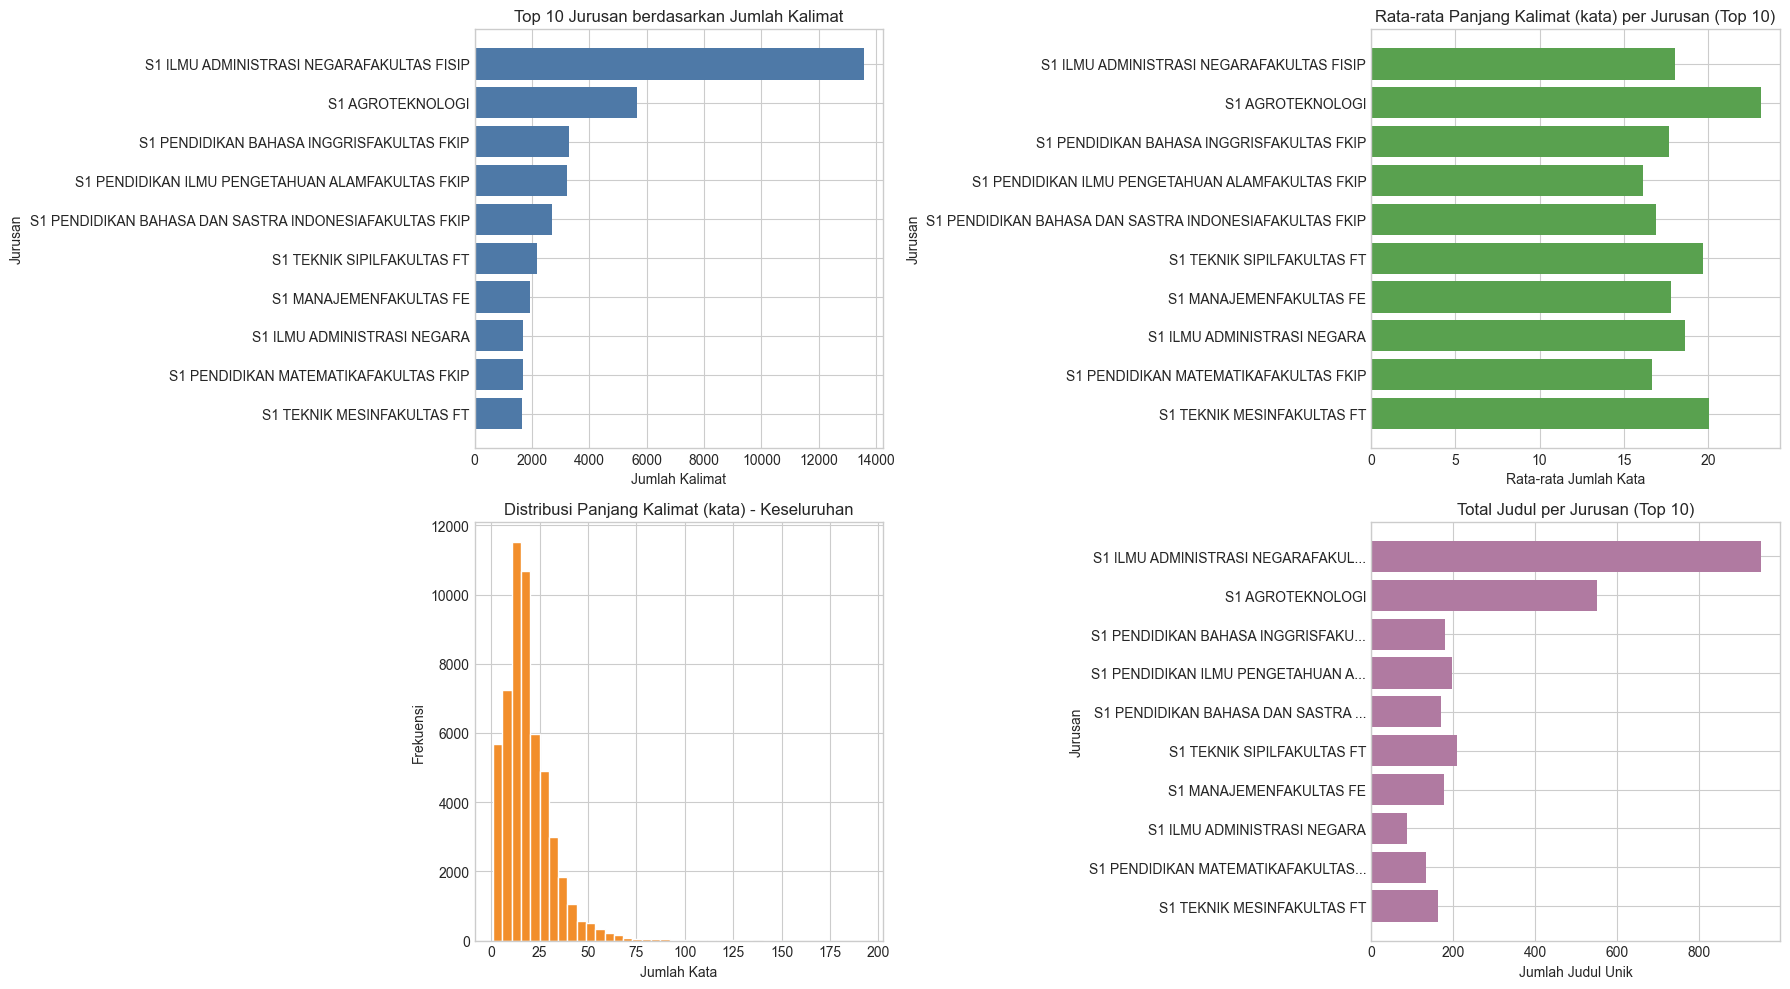

In [17]:
# Visualisasi: top 10 jurusan (jumlah kalimat), rata-rata panjang kalimat per jurusan,
# distribusi panjang kalimat keseluruhan, dan total judul per jurusan (Top 10)
import matplotlib.pyplot as plt

clean_path = Path(INPUT_CSV_PATH).with_name(Path(INPUT_CSV_PATH).stem + OUTPUT_SUFFIX + ".csv")
if not clean_path.exists():
    main()

df_vis = pd.read_csv(clean_path, encoding=ENCODING_OUT)

# Normalisasi kolom yang dipakai
df_vis["Jurusan_norm"] = df_vis["Jurusan"].fillna("").astype(str).str.strip()
df_vis = df_vis[df_vis["Jurusan_norm"] != ""].copy()
word_len = df_vis["Kalimat"].fillna("").astype(str).str.split().map(len)

# Top 10 jurusan berdasarkan jumlah kalimat
jurusan_counts = (
    df_vis.groupby("Jurusan_norm").size().sort_values(ascending=False).head(10)
)
top10 = jurusan_counts.index.tolist()

# Rata-rata panjang kalimat (kata) per jurusan (mengikuti urutan top10 di atas)
avg_len_per_jur = (
    df_vis.assign(_wl=word_len)
          .groupby("Jurusan_norm")["_wl"]
          .mean()
          .loc[top10]
)

# Fallback style agar kompatibel lintas versi Matplotlib
try:
    plt.style.use("seaborn-v0_8-whitegrid")
except (AttributeError, ValueError):
    try:
        plt.style.use("seaborn-whitegrid")
    except (AttributeError, ValueError):
        plt.style.use("default")

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
ax = axes.ravel()

# 1) Top 10 jurusan: jumlah kalimat
ax[0].barh(jurusan_counts.index[::-1], jurusan_counts.values[::-1], color="#4E79A7")
ax[0].set_title("Top 10 Jurusan berdasarkan Jumlah Kalimat")
ax[0].set_xlabel("Jumlah Kalimat")
ax[0].set_ylabel("Jurusan")

# 2) Rata-rata panjang kalimat per jurusan (kata) untuk top 10
ax[1].barh(avg_len_per_jur.index[::-1], avg_len_per_jur.values[::-1], color="#59A14F")
ax[1].set_title("Rata-rata Panjang Kalimat (kata) per Jurusan (Top 10)")
ax[1].set_xlabel("Rata-rata Jumlah Kata")
ax[1].set_ylabel("Jurusan")

# 3) Distribusi panjang kalimat (kata) keseluruhan
ax[2].hist(word_len, bins=40, color="#F28E2B", edgecolor="white")
ax[2].set_title("Distribusi Panjang Kalimat (kata) - Keseluruhan")
ax[2].set_xlabel("Jumlah Kata")
ax[2].set_ylabel("Frekuensi")

# 4) Total judul per jurusan (Top 10) - hitung judul unik per jurusan
titles_per_jur = (
    df_vis.groupby("Jurusan_norm")["Judul"]
          .nunique()
          .loc[top10]
)
data_order = titles_per_jur.iloc[::-1]
labels = [j if len(j) <= 35 else (j[:32] + "...") for j in data_order.index]

ax[3].cla()
ax[3].barh(range(len(data_order)), data_order.values, color="#B07AA1")
ax[3].set_yticks(range(len(data_order)))
ax[3].set_yticklabels(labels)
ax[3].set_title("Total Judul per Jurusan (Top 10)")
ax[3].set_xlabel("Jumlah Judul Unik")
ax[3].set_ylabel("Jurusan")

plt.tight_layout()
plt.show()


supervisee data dengan cara manual masih diperlukan untuk mengecek dan menghilangkan kalimat yang tidak sesuai, seperti hanya tahun sja atau nama penulis yang masuk pada kalimat


### Data Scoring and Labeling

Data scoring adalah proses memberi nilai atau skor pada data berdasarkan kriteria tertentu—biasanya untuk evaluasi, ranking, atau prediksi.
Data labeling adalah proses memberi label atau tag pada data mentah agar bisa digunakan untuk pelatihan model machine learning.


Tujuan Labeling & Scoring
1. Labeling akan memberi identitas atau kategori pada data agar bisa dianalisis atau dilatih ke model.
2. Scoring akan memberi nilai atau ukuran pada data untuk evaluasi, klasifikasi, atau prediksi.

Manfaat Labeling & Scoring
1. Mempermudah analisis linguistik berbasis metrik.
2. Bisa digunakan untuk pelatihan model NLP (misalnya klasifikasi gaya tulisan).
3. Menyediakan dasar untuk audit kualitas teks (misalnya keterbacaan, kekonkretan).
4. Bisa dipakai untuk membandingkan skripsi, artikel, atau kampanye branding berbasis gaya bahasa.


In [20]:
"""
Mini Pipeline: TERA-style Readability Metrics for Indonesian (0–100)

Top Sikrit kode ruwet pusingnya kemana mana XD 

Metrics produced per text:
- Narrativity (0–100)
- Syntactic_Simplicity (0–100)
- Word_Concreteness (0–100)
- Referential_Cohesion (0–100)
- Deep_Cohesion (0–100)
- Flesch_Score_Raw (heuristic, 0–100)
- Flesch_Score_Normalized (0–100)
- Flesch_Category (Mudah/Sedang/Sulit)

Design goals:
- Dependency-light, pure Python (no heavy NLP models required)
- Heuristic but stable (bounded 0–100, no exploding values)
- Easily extensible: you can plug in IndoBERT/SBERT later to improve cohesion/narrativity

Usage example:
>>> from versi3_5 import score_text
>>> text = "Penelitian bertujuan untuk mengetahui pengaruh komposisi media tanam dan pemberian konsentrasi MSG terhadap pertumbuhan vanili (Vanilla planifolia) stek satu ruas."
>>> score_text(text)

CLI:
$ python versi3_5.py "Teks Anda di sini"
$ python versi3_5.py --csv input.csv --text-col Teks --out scores.csv
$ python versi3_5.py --stanza-dir models/stanza_resources --sbert-dir models/sbert

CSV mode expects a column with raw text.
"""

# install dependencies:
## pip install stanza sentence-transformers

from __future__ import annotations
import re
import math
import csv
import argparse
from dataclasses import dataclass, asdict
from typing import List, Dict, Tuple

# === Local model directory (edit berdasar layout) ===
import os
try:
    BASE_DIR = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # In Jupyter notebooks, __file__ is not defined; fallback to current working directory
    BASE_DIR = os.getcwd()
# Default: models/stanza_resources and models/sbert (relative to this file)
STANZA_DIR = os.path.join(BASE_DIR, 'models', 'stanza_resources')
SBERT_DIR  = os.path.join(BASE_DIR, 'models', 'sbert')
# Allow overrides via environment variables if provided
STANZA_DIR = os.environ.get('STANZA_RESOURCES_DIR', STANZA_DIR)
SBERT_DIR  = os.environ.get('SBERT_CACHE_DIR', SBERT_DIR)

# ----------------------------
# Optional advanced integrations (auto-detect)
# ----------------------------
USE_ADVANCED = True  # set False to force simple heuristics

_stanza = None
_stanza_nlp = None
_sbert = None
_sbert_model = None

if USE_ADVANCED:
    # ---- Stanza (LOCAL ONLY; no download here) ----
    try:
        import stanza  # type: ignore
        _stanza = stanza
        os.makedirs(STANZA_DIR, exist_ok=True)
        _stanza_nlp = stanza.Pipeline(
            'id',
            processors='tokenize,pos,lemma,depparse',
            tokenize_no_ssplit=False,
            verbose=False,
            dir=STANZA_DIR,  # <= load from local resources
        )
    except Exception:
        _stanza = None
        _stanza_nlp = None

    # ---- Sentence-Transformers (prefer local cache/model) ----
    try:
        from sentence_transformers import SentenceTransformer  # type: ignore
        _sbert = SentenceTransformer
        local_sbert_path = os.path.join(SBERT_DIR, 'paraphrase-multilingual-MiniLM-L12-v2')
        if os.path.isdir(local_sbert_path):
            _sbert_model = SentenceTransformer(local_sbert_path)
        else:
            os.makedirs(SBERT_DIR, exist_ok=True)
            _sbert_model = SentenceTransformer(
                'paraphrase-multilingual-MiniLM-L12-v2',
                cache_folder=SBERT_DIR
            )
    except Exception:
        _sbert = None
        _sbert_model = None

# ----------------------------
# Basic text utilities
# ----------------------------
VOWELS = set(list("aiueoAIUEO"))

# list stopwords (bisa diperluas)
STOPWORDS = set(
    "yang di ke dari kepada untuk dengan pada oleh demi agar supaya sehingga karena namun tetapi sedangkan atau dan serta pun bila jika ketika maka lalu kemudian sehingga yaitu yakni adalah ialah seperti sebagai dalam terhadap antara tanpa bukan bukanlah bukanlah pun ini itu itu pun tersebut para para nya nya pun saya aku kami kita kamu Anda anda beliau dia mereka sini sana situ itu pun hal bhw bahwa hingga hingga pun tiap setiap tiapnya seluruh seluruhnya beberapa berbagai pun akan telah telahlah telahpun sudah sudahpun telah sudah pernah sedang sedanglah sedangpun telahlah belum belumlah belumpun masih masihlah masihpun akan punlah dapat bisa mungkin tentu harus wajib tak tidak bukan bukanlah jangan ya pun punlah punnya walau walaupun meski meskipun sebaliknya sekalipun selainnya selain selainpun hingga ketika saat waktu sewaktu seraya sambil sambilpun sementara sementara itu kemudian lantas lalu selanjutnya berikutnya selaku selagi selama sehabis seusai setelah sebelum sebelumya sebelum pun sesudah sesudahnya maka yaitu yakni sebab karenanya akibatnya oleh karena itu contohnya misalnya misal".split()
)

# Connectives untuk deep cohesion (causal/temporal/contrastive)
CONNECTIVES = {
    # causal
        "karena", "sebab", "akibatnya", "sehingga", "maka",
        "oleh", "oleh karena itu", "oleh sebab itu", "disebabkan oleh",
        "yang menyebabkan", "yang mengakibatkan", "dengan demikian",
        "sebagai akibat", "konsekuensinya", "sebagai konsekuensi", "dampaknya", "implikasinya", "berkat",

    # contrast
        "namun", "tetapi", "meski", "meskipun", "walau",
        "sebaliknya", "padahal", "berbeda dengan", "di sisi lain",
        "kendati demikian", "walaupun demikian", "akan tetapi",
        "namun demikian", "meskipun demikian", "sekalipun demikian",
        "bertolak belakang dengan",
    
    # temporal
        "kemudian", "lalu", "selanjutnya", "berikutnya",
        "sebelumnya", "setelah", "sebelum", "setelah itu",
        "pada tahap berikutnya", "pada akhirnya", "selama",
        "ketika", "saat", "seiring dengan", "hingga",
        "sementara itu", "pada saat yang sama", "di kemudian hari",
        "sepanjang", "sejak itu", "di awal", "di akhir",
    
    # exemplify
        "misal", "misalnya", "contohnya", "sebagai contoh",
        "yakni", "yaitu", "dengan kata lain", "antara lain",
        "seperti", "termasuk", "sebagai ilustrasi", "contoh kasus",
        "khususnya",
    
    # additive
        "selain itu", "di samping itu", "lebih lanjut",
        "lebih jauh", "lagipula",
    
    # conclusion"
        "sebagai kesimpulan", "kesimpulannya",
        "dapat disimpulkan bahwa", "ringkasnya", "singkatnya",
        "dari paparan tersebut",
    
    # conditional
        "jika", "apabila", "bila", "seandainya",
        "asalkan", "jikalau", "andaikan", "kecuali jika"
    
    # purpose
        "agar", "supaya", "guna", "dalam rangka",

    # comparison
        "dibandingkan dengan", "dibanding dengan",
        "seperti halnya", "serupa dengan", "berkebalikan dengan", 
    
    # definition
        "didefinisikan sebagai", "yang dimaksud dengan",
        "dalam konteks ini", "dalam hal ini",

    # attribution
        "berdasarkan", "menurut", "mengacu pada", "merujuk pada",
    
    # limitation
        "terbatas pada", "hanya saja", "sebatas"
}


# Verb/action cues for narrativity (extendable)
ACTION_VERBS = {
    # Gerak dasar
    "pergi","datang","pulang","berjalan","berlari","melompat","masuk","keluar","naik","turun",
    "mendekat","menjauh","kembali","berputar","berhenti","bergerak",
    # Interaksi / komunikasi
    "berkata","bercerita","menceritakan","mengisahkan","menjelaskan","menjawab","bertanya",
    "mengungkapkan","mengucapkan","menyebutkan","memberitahu","menyampaikan","menegaskan",
    "menambahkan","mengulangi","mendengar","menyimak","menanggapi","membantah",
    # Persepsi / kognisi
    "melihat","menatap","memandang","memperhatikan","mengamati","menemukan","menyadari",
    "mengingat","membayangkan","memikirkan","menganalisis","menilai","mengukur","menghitung",
    "mengidentifikasi","mencatat","menafsirkan","mengecek","memeriksa","meneliti","mengumpulkan",
    "menyimpulkan","membandingkan","memutuskan","memilih","merencanakan","mengembangkan",
    # Tindakan fisik / manipulasi objek
    "mengambil","mengerjakan","menaruh","meletakkan","membawa","memindahkan","membuka","menutup","memasukkan",
    "mengeluarkan","menyusun","menyiapkan","membuat","membangun","mencetak","memotong",
    "mengaduk","mencampur","memasak","menggoreng","memanggang","mencuci","membersihkan",
    "mengeringkan","mengganti","memperbaiki","memasang","melepas","mengikat","menggosok",
    "menekan","menarik","mendorong","menggenggam","menyalakan","mematikan","menghidupkan",
    # Produksi / dokumen / teknologi
    "menulis","menyalin","mengedit","menghapus","mengunggah","mengunduh","menyimpan",
    "mengirim","mengirimkan","mengunduh","memprogram","mengkode","menjalankan","mengoperasikan",
    # Proses / perubahan
    "terjadi","muncul","timbul","membesar","mengecil","berubah","menghilang","membeku",
    "mencair","mendadak","membentuk","menghasilkan","mengakibatkan","menyebabkan",
    # Sosial / bantuan / konflik
    "membantu","menolong","menyelamatkan","menjaga","melindungi","mengawal","menemani",
    "menghadapi","menyerang","menolak","menerima","menegur","memarahi","menghibur",
    "menghadiri","mengikuti","berkumpul","bertemu","berdiskusi","berkolaborasi",
    # Emosi / reaksi
    "tersenyum","tertawa","menangis","meratap","mengeluh","menghela","menarik napas",
    "terkejut","kaget","marah","kesal","bangga","gugup","cemas","tenang","lega","sedih",
    # Hasil / capaian
    "mencoba","berhasil","gagal","mencapai","meraih","mendapatkan","kehilangan","menemukan",
    "mengumpulkan","menyelesaikan","melanjutkan","menghentikan","mengakhiri","memulai",
    # Pencarian / orientasi
    "mencari","menemukan","menelusuri","mengejar","melacak","mengikuti","mengawasi",
    # Waktu / rutinitas
    "menunggu","menjadwalkan","menunda","mempercepat","melanjutkan","mengulang","mengawali",
    # Fisiologis
    "makan","memakan","minum","meminum","tidur","bangun","bernapas","beristirahat",
    # Lain naratif umum
    "berjuang","bertahan","menyerah","menyatu","memisahkan","menghubungkan","menyatukan",
    "mengendalikan","menguasai","mengelola","mengurangi","menambah","meningkatkan",
    "menurunkan","mempercepat","memperlambat","menyaring","mengurutkan","menyalurkan"
}
# ===== Narativity feature extractors (ID) =====

TIME_WORDS = {
    "kemarin","tadi","besok","nanti","sekarang","pada","pukul","jam",
    "minggu","bulan","tahun","januari","februari","maret","april","mei","juni",
    "juli","agustus","september","oktober","november","desember","hari","senin",
    "selasa","rabu","kamis","jumat","sabtu","minggu"
}
PLACE_PREPS = {"di","ke","dari"}
PASSIVE_HINTS = {"oleh"}  # + prefix 'di-' di kata kerja

def _has_time_place(text: str, toks: List[str]) -> Tuple[float, float]:
    tset = set(toks)
    time_hit = any(w in tset for w in TIME_WORDS) or bool(re.search(r"\b(20\d{2}|19\d{2})\b", text))
    # tempat: preposisi tempat + kata setelahnya
    place_hit = False
    words = toks
    for i, w in enumerate(words[:-1]):
        if w in PLACE_PREPS:
            nxt = words[i+1]
            # heuristik: bukan stopword & bukan angka = kandidat lokasi
            if nxt not in STOPWORDS and not nxt.isdigit():
                place_hit = True; break
    return (1.0 if time_hit else 0.0, 1.0 if place_hit else 0.0)

def _pronoun_density(toks: List[str]) -> float:
    if not toks: return 0.0
    pr = sum(1 for t in toks if t in PRONOUNS)
    return pr / len(toks)

def _actionverb_density(toks: List[str]) -> float:
    if not toks: return 0.0
    av = sum(1 for t in toks if t in ACTION_VERBS)
    return av / len(toks)

def _passive_rate_id(tokens: List[str]) -> float:
    """Heuristik pasif: kata kerja berprefiks 'di-' + 'oleh' sebagai sinyal."""
    if not tokens: return 0.0
    di_verb = sum(1 for t in tokens if re.match(r"^di[a-z]", t) and t not in {"dia","di"})
    oleh = sum(1 for t in tokens if t in PASSIVE_HINTS)
    rate = (di_verb + 0.5*oleh) / max(1, len(tokens))
    # batasi agar tidak ‘menghukum’ terlalu besar
    return min(0.3, rate)

def _propn_density_with_stanza(sentences: List[str]) -> float:
    """Butuh _stanza_nlp. Propn density ~ entitas tokoh/tempat."""
    if _stanza_nlp is None or not sentences:
        return 0.0
    try:
        doc = _stanza_nlp(" ".join(sentences))
        total = 0; propn = 0
        for s in doc.sentences:
            for w in s.words:
                total += 1
                if getattr(w, "upos", "") == "PROPN":
                    propn += 1
        return propn / max(1, total)
    except Exception:
        return 0.0

PRONOUNS = {"saya", "aku", "kami", "kita", "kamu", "anda", "beliau", "dia", "mereka"}
NARRATIVE_MARKERS = ACTION_VERBS | PRONOUNS | {"kisah", "cerita", "tokoh"}

# --- Implementasi narativity dengan fitur-fitur di atas ---

# Seeds for concreteness (expand with your domain vocabulary)
CONCRETE_SEEDS = {
    # benda nyata/fisik
    "kursi", "meja", "apel", "air", "tanah", "vanili", "daun", "akar", "batang", "bunga",
    "kompor", "motor", "ban", "alat", "sensor", "kamera", "data", "peta", "rumah", "sekolah",
    "media", "tanam", "MSG", "larutan", "konsentrasi", "pertumbuhan", "biji", "buah",
    "buku", "pena", "kertas", "pintu", "jendela", "mobil", "sepeda", "jalan", "gunung",
    "laut", "sungai", "hutan", "hewan", "ikan", "ayam", "sapi", "burung", "kucing", "anjing",
    "komputer", "televisi", "radio", "lampu", "gelas", "piring", "sendok", "garpu", "tas",
    "baju", "celana", "sepatu", "topi", "jaket", "jam", "uang", "koin", "dompet", "kunci",
    "gedung", "jembatan", "taman", "pasar", "warung", "restoran", "hotel", "bandara",
    "kereta", "stasiun", "bus", "terminal", "kapal", "pelabuhan", "band", "alat musik",
    "gitar", "piano", "drum", "mikrofon", "speaker", "printer", "scanner", "proyektor",
    "kursus", "kelas", "laboratorium", "perpustakaan", "kantor", "ruang", "tempat", "kamar",
    "ranjang", "lemari", "rak", "dapur", "toilet", "kamar mandi", "atap", "lantai", "tembok",
    "pagar", "tanaman", "pot", "benih", "pupuk", "air", "ember", "selang", "sumur", "pompa",
    "sepeda motor", "mobil", "truk", "angkot", "ojek", "perahu", "kapal", "pesawat", "helikopter",
    "jalan raya", "trotoar", "lampu lalu lintas", "rambu", "halte", "parkir", "garasi",
}

ABSTRACT_SEEDS = {
    # konsep, ide, sifat, proses
    "kebebasan", "keadilan", "pertumbuhan", "kualitas", "efektivitas", "strategi", "kebijakan",
    "metode", "konsep", "teori", "proses", "pengaruh", "hubungan", "korelasi", "analisis",
    "pengetahuan", "pemahaman", "pendidikan", "kesehatan", "keamanan", "kepercayaan",
    "kesuksesan", "kegagalan", "kemajuan", "kemunduran", "perubahan", "perkembangan",
    "perencanaan", "penelitian", "penemuan", "penyelesaian", "penyebab", "akibat", "tujuan",
    "harapan", "cita-cita", "impian", "motivasi", "inspirasi", "kreativitas", "inovasi",
    "nilai", "norma", "etika", "moral", "agama", "kepercayaan", "budaya", "tradisi",
    "identitas", "karakter", "sikap", "perasaan", "emosi", "pikiran", "ide", "gagasan",
    "pendapat", "argumen", "alasan", "logika", "fakta", "opini", "teknik", "sistem",
    "struktur", "fungsi", "peran", "tanggung jawab", "hak", "kewajiban", "kebutuhan",
    "keinginan", "pilihan", "kesempatan", "tantangan", "masalah", "solusi", "resiko",
    "manfaat", "kerugian", "keuntungan", "biaya", "waktu", "proyek", "program", "agenda",
    "visi", "misi", "sasaran", "target", "indikator", "evaluasi", "monitoring", "kontrol",
}

# Clause markers (very rough heuristic for clause counting)
CLAUSE_MARKERS = {
    ",", ";", ":", 
    "yang", "bahwa", "karena", "agar", "walaupun", "meskipun", "sehingga",
    "jika", "bila", "apabila", "supaya", "untuk", "sebab", "sebabnya",
    "tetapi", "namun", "sedangkan", "sementara", "padahal", "walau", "walaupun",
    "lalu", "kemudian", "setelah", "sebelum", "hingga", "sampai", "seandainya",
    "andaikan", "asalkan", "meski", "meskipun", "oleh karena itu", "akibatnya"
}

# === Improved Sentence & Word Tokenizer (Indonesian-aware) ===

ID_ABBR = {
    "dr.", "drg.", "prof.", "ir.", "s.t.", "s.kom.", "m.kom.", "s.pd.",
    "s.si.", "m.si.", "m.sc.", "m.eng.", "m.t.", "ph.d.", "no.", "hlm.",
    "dsb.", "dll.", "dkk.", "s.d.", "u.u.d.", "ttg.", "pas.", "ayat.", "rp."
}
EN_ABBR = {"mr.", "mrs.", "ms.", "dr.", "prof.", "etc.", "e.g.", "i.e."}
SAFE_ABBR = ID_ABBR | EN_ABBR

RE_EMAIL    = re.compile(r"\b[A-Za-z0-9._%+\-]+@[A-Za-z0-9.\-]+\.[A-Za-z]{2,}\b")
RE_URL      = re.compile(r"\bhttps?://[^\s]+|\bwww\.[^\s]+\b", re.IGNORECASE)
RE_INITIALS = re.compile(r"(?<=\b[A-Za-z])\.(?=\s*[A-Za-z]\b)")
RE_DECIMAL  = re.compile(r"(?<=\d)\.(?=\d)")
RE_ELLIPSIS = re.compile(r"\.\.\.+")
RE_WORD     = re.compile(r"[A-Za-zÀ-ÖØ-öø-ÿ0-9\-]+")

def _tok_mask(text: str) -> str:
    t = text

    def dotmask(m: re.Match) -> str:
        return m.group(0).replace(".", "<DOT>")
    t = RE_URL.sub(dotmask, t)
    t = RE_EMAIL.sub(dotmask, t)

    t = RE_ELLIPSIS.sub("<ELLIPSIS>", t)

    abbr_alt = "|".join(re.escape(a) for a in sorted(SAFE_ABBR))
    def mask_abbr(m: re.Match) -> str:
        return m.group(0)[:-1] + "<DOT>"
    t = re.sub(rf"(?i)\b(?:{abbr_alt})", mask_abbr, t)

    t = RE_INITIALS.sub("<DOT>", t)
    t = RE_DECIMAL.sub("<DOT>", t)
    return t

def _tok_unmask(text: str) -> str:
    return text.replace("<ELLIPSIS>", "…").replace("<DOT>", ".")

def sentence_split(text: str, hard_wrap_words: int = 0) -> List[str]:
    if not text:
        return []
    text = re.sub(r"\s+", " ", text).strip()
    if not text:
        return []

    protected = _tok_mask(text)
    parts = re.split(r"(?<=[.!?])\s+", protected)

    if hard_wrap_words and hard_wrap_words > 0:
        wrapped: List[str] = []
        for p in parts:
            ws = p.split()
            if len(ws) > hard_wrap_words:
                for i in range(0, len(ws), hard_wrap_words):
                    wrapped.append(" ".join(ws[i:i + hard_wrap_words]))
            else:
                wrapped.append(p)
        parts = wrapped

    sents = [_tok_unmask(p).strip() for p in parts if p and p.strip()]
    return sents if sents else [text]

def word_tokenize(text: str) -> List[str]:
    if not text:
        return []
    spans = []
    for m in RE_URL.finditer(text):
        spans.append((m.start(), m.end()))
    for m in RE_EMAIL.finditer(text):
        spans.append((m.start(), m.end()))
    spans.sort()
    toks: List[str] = []
    i = 0
    for s, e in spans:
        if i < s:
            toks.extend(RE_WORD.findall(text[i:s]))
        toks.append(text[s:e])
        i = e
    if i < len(text):
        toks.extend(RE_WORD.findall(text[i:]))

    return [t.lower() for t in toks if t]

def syllable_count_id(word: str) -> int:
    if not word:
        return 1
    groups = re.findall(r"[aiueo]+", word.lower())
    return max(1, len(groups))
# ----------------------------
# Tokenization & syllables
# ----------------------------
def sentence_split(text: str) -> List[str]:
    text = re.sub(r"\s+", " ", text).strip()
    protected = text.replace("dr.", "dr<dot>").replace("s.d.", "s<dot>d<dot>")
    protected = protected.replace("dll.", "dll<dot>").replace("dsb.", "dsb<dot>")
    
    # Pisah berdasarkan tanda baca + spasi atau akhir teks
    parts = re.split(r"(?<=[.!?;:])\s+", protected)
    
    # Tambahan: pisah jika terlalu panjang (>30 kata) dan tidak ada tanda baca
    extended = []
    for p in parts:
        words = p.split()
        if len(words) > 30:
            chunks = [" ".join(words[i:i+30]) for i in range(0, len(words), 30)]
            extended.extend(chunks)
        else:
            extended.append(p)
    
    sents = [p.replace("<dot>", ".").strip() for p in extended if p.strip()]
    return sents if sents else ([text] if text else [])


def word_tokenize(text: str) -> List[str]:
    return re.findall(r"[A-Za-zÀ-ÖØ-öø-ÿ0-9_\-]+", text.lower())

def syllable_count_id(word: str) -> int:
    groups = re.findall(r"[aiueo]+", word.lower())
    return max(1, len(groups))

# ----------------------------
# Normalization helpers (0–100)
# ----------------------------
def clamp01(x: float) -> float:
    return max(0.0, min(1.0, x))

def to_0_100(x: float) -> float:
    return round(clamp01(x) * 100.0, 1)

def inv_scale(x: float, lo: float, hi: float) -> float:
    if hi <= lo:
        return 1.0
    x = max(lo, min(hi, x))
    return 1.0 - (x - lo) / (hi - lo)

# ----------------------------
# Metric computations
# ----------------------------

def narrativity(sentences):
    if not sentences:
        return 0.0
    text = " ".join(sentences)
    toks = word_tokenize(text)
    if not toks:
        return 0.0
    pron = _pronoun_density(toks)
    action = _actionverb_density(toks)
    time_hit, place_hit = _has_time_place(text, toks)
    char_propn = _propn_density_with_stanza(sentences)
    passive_penalty = _passive_rate_id(toks)
    base = (
        0.20 * pron +
        0.30 * action +
        0.10 * time_hit +
        0.10 * place_hit +
        0.10 * char_propn
    )
    # add small baseline and subtract limited passive penalty
    score = max(0.0, min(1.0, base - 0.5 * passive_penalty + 0.20))
    return to_0_100(score * 100.0)
TIME_WORDS = {
    "kemarin","tadi","besok","nanti","sekarang","pada","pukul","jam",
    "minggu","bulan","tahun","januari","februari","maret","april","mei","juni",
    "juli","agustus","september","oktober","november","desember","hari","senin",
    "selasa","rabu","kamis","jumat","sabtu","minggu"
}
PLACE_PREPS = {"di","ke","dari"}
PASSIVE_HINTS = {"oleh"}  # + prefix 'di-' di kata kerja

def _has_time_place(text: str, toks: List[str]) -> Tuple[float, float]:
    tset = set(toks)
    time_hit = any(w in tset for w in TIME_WORDS) or bool(re.search(r"\b(20\d{2}|19\d{2})\b", text))
    # tempat: preposisi tempat + kata setelahnya
    place_hit = False
    words = toks
    for i, w in enumerate(words[:-1]):
        if w in PLACE_PREPS:
            nxt = words[i+1]
            # heuristik: bukan stopword & bukan angka = kandidat lokasi
            if nxt not in STOPWORDS and not nxt.isdigit():
                place_hit = True; break
    return (1.0 if time_hit else 0.0, 1.0 if place_hit else 0.0)

def _pronoun_density(toks: List[str]) -> float:
    if not toks: return 0.0
    pr = sum(1 for t in toks if t in PRONOUNS)
    return pr / len(toks)

def _actionverb_density(toks: List[str]) -> float:
    if not toks: return 0.0
    av = sum(1 for t in toks if t in ACTION_VERBS)
    return av / len(toks)

def _passive_rate_id(tokens: List[str]) -> float:
    """Heuristik pasif: kata kerja berprefiks 'di-' + 'oleh' sebagai sinyal."""
    if not tokens: return 0.0
    di_verb = sum(1 for t in tokens if re.match(r"^di[a-z]", t) and t not in {"dia","di"})
    oleh = sum(1 for t in tokens if t in PASSIVE_HINTS)
    rate = (di_verb + 0.5*oleh) / max(1, len(tokens))
    # batasi agar tidak ‘menghukum’ terlalu besar
    return min(0.3, rate)

def _propn_density_with_stanza(sentences: List[str]) -> float:
    """Butuh _stanza_nlp. Propn density ~ entitas tokoh/tempat."""
    if _stanza_nlp is None or not sentences:
        return 0.0
    try:
        doc = _stanza_nlp(" ".join(sentences))
        total = 0; propn = 0
        for s in doc.sentences:
            for w in s.words:
                total += 1
                if getattr(w, "upos", "") == "PROPN":
                    propn += 1
        return propn / max(1, total)
    except Exception:
        return 0.0

PRONOUNS = {"saya", "aku", "kami", "kita", "kamu", "anda", "beliau", "dia", "mereka"}
NARRATIVE_MARKERS = ACTION_VERBS | PRONOUNS | {"kisah", "cerita", "tokoh"}

# --- Implementasi narativity dengan fitur-fitur di atas ---

def syntactic_simplicity(sentences: List[str]) -> float:
    """If Stanza is available, use dependency-based complexity; else fallback to heuristic."""
    if not sentences:
        return 100.0

    if _stanza_nlp is not None:
        try:
            doc = _stanza_nlp(" ".join(sentences))
            sent_scores = []
            for s in doc.sentences:
                children = {i+1: [] for i in range(len(s.words))}
                for i, w in enumerate(s.words, start=1):
                    if w.head in children:
                        children[w.head].append(i)
                def depths(start: int, d: int, acc: List[int]):
                    acc.append(d)
                    for ch in children.get(start, []):
                        depths(ch, d+1, acc)
                all_depths: List[int] = []
                depths(0, 0, all_depths)  # roots have head=0
                avg_depth = sum(all_depths) / max(1, len(all_depths))
                subcls = sum(1 for w in s.words if w.deprel in {"advcl","ccomp","xcomp","acl","mark","conj"})
                sent_len = len(s.words)
                depth_simple = inv_scale(avg_depth, 1.0, 6.0)
                sub_simple = inv_scale(subcls, 0.0, 4.0)
                len_simple = inv_scale(sent_len, 8.0, 35.0)
                sent_scores.append(0.4*depth_simple + 0.35*sub_simple + 0.25*len_simple)
            return to_0_100(sum(sent_scores)/max(1,len(sent_scores)))
        except Exception:
            pass  # fall back

    # Fallback heuristic
    tok_sents = [word_tokenize(s) for s in sentences]
    lens = [len(ts) for ts in tok_sents if ts]
    if not lens:
        return 100.0
    avg_len = sum(lens) / len(lens)
    clause_counts = []
    for s in sentences:
        tokens = set(word_tokenize(s))
        count = 0
        for m in CLAUSE_MARKERS:
            if m in {",", ";", ":"}:
                count += s.count(m)
            else:
                count += (m in tokens)
        clause_counts.append(count)
    avg_clause = sum(clause_counts) / max(1, len(clause_counts))
    len_simple = inv_scale(avg_len, 8.0, 30.0)
    clause_simple = inv_scale(avg_clause, 0.0, 4.0)
    simp = 0.7 * len_simple + 0.3 * clause_simple
    return to_0_100(simp)

def word_concreteness(tokens: List[str]) -> float:
    if not tokens:
        return 50.0
    content = [t for t in tokens if t not in STOPWORDS]
    if not content:
        return 50.0
    concrete = sum(1 for t in content if t in CONCRETE_SEEDS)
    abstract = sum(1 for t in content if t in ABSTRACT_SEEDS)
    base = (concrete - abstract)
    score = 0.5 + 0.5 * (base / max(1.0, len(content) ** 0.7))
    return to_0_100(score)


def jaccard(a: set, b: set) -> float:
    if not a and not b:
        return 1.0
    return len(a & b) / max(1, len(a | b))

def referential_cohesion(sentences: List[str]) -> float:
    if not sentences:
        return 0.0

    if _sbert_model is not None and len(sentences) > 1:
        try:
            embs = _sbert_model.encode(sentences, convert_to_numpy=True, normalize_embeddings=True)
            sims = [float(embs[i].dot(embs[i+1])) for i in range(len(embs)-1)]  # cosine with normalized vectors
            sims01 = [(s+1)/2 for s in sims]
            return to_0_100(sum(sims01)/len(sims01))
        except Exception:
            pass

    content_sents = []
    for s in sentences:
        toks = [t for t in word_tokenize(s) if t not in STOPWORDS and not t.isdigit()]
        content_sents.append(set(toks))
    if len(content_sents) == 1:
        return 20.0
    overlaps = [jaccard(content_sents[i], content_sents[i+1]) for i in range(len(content_sents)-1)]
    avg_overlap = sum(overlaps) / len(overlaps)
    return to_0_100(avg_overlap)


def deep_cohesion(text: str) -> float:
    t = text.lower()
    counts = 0
    for c in CONNECTIVES:  # <- tidak pakai .values()
        matches = re.findall(rf"(?<!\w){re.escape(c)}(?!\w)", t)
        counts += len(matches)
    num_sents = max(1, len(sentence_split(text)))
    return counts / num_sents




def inv_scale(x: float, low: float, high: float) -> float:
    """Skala invers antara low dan high, dibatasi 0–1."""
    return max(0.0, min(1.0, (high - x) / (high - low)))

def flesch_like_id(sentences: List[str]) -> Tuple[float, float, str]:
    if not sentences:
        return 100.0, 100.0, "Mudah"
    
    text = " ".join(sentences)
    toks = word_tokenize(text)
    if not toks:
        return 100.0, 100.0, "Mudah"
    
    words = len(toks)
    sents = len(sentences)
    syll = sum(syllable_count_id(w) for w in toks)

    wps = words / max(1, sents)  # words per sentence
    spw = syll / max(1, words)  # syllables per word

    # Rentang disesuaikan untuk toleransi teks ilmiah
    ease = (
        inv_scale(wps, 10.0, 40.0) * 0.6 +
        inv_scale(spw, 1.3, 2.5) * 0.4
    )

    raw = ease * 100.0
    norm = to_0_100(ease)

    if norm >= 80:
        cat = "Sangat Mudah"
    elif norm >= 60:
        cat = "Mudah"
    elif norm >= 40:
        cat = "Sedang"
    elif norm >= 20:
        cat = "Cukup Sulit"
    else:
        cat = "Sangat Sulit"

    return raw, norm, cat


@dataclass
class TeraScores:
    Narrativity: float
    Syntactic_Simplicity: float
    Word_Concreteness: float
    Referential_Cohesion: float
    Deep_Cohesion: float
    Flesch_Score_Raw: float
    Flesch_Score_Normalized: float
    Flesch_Category: str

def score_text(text: str) -> Dict[str, object]:
    text = (text or "").strip()
    sents = sentence_split(text)
    tokens = word_tokenize(text)

    narr = narrativity(sents)
    synt = syntactic_simplicity(sents)
    conc = word_concreteness(tokens)
    refc = referential_cohesion(sents)
    deep = deep_cohesion(text)
    flesch_raw, flesch_norm, flesch_cat = flesch_like_id(sents)

    scores = TeraScores(
        Narrativity=narr,
        Syntactic_Simplicity=synt,
        Word_Concreteness=conc,
        Referential_Cohesion=refc,
        Deep_Cohesion=deep,
        Flesch_Score_Raw=flesch_raw,
        Flesch_Score_Normalized=flesch_norm,
        Flesch_Category=flesch_cat,
    )
    return asdict(scores)

# ----------------------------
# CSV helpers
# ----------------------------
def score_csv(in_path: str, text_col: str, out_path: str) -> None:
    rows = []
    with open(in_path, newline="", encoding="utf-8") as f:
        reader = csv.DictReader(f)
        if text_col not in reader.fieldnames:
            raise ValueError(f"Column '{text_col}' not found. Available: {reader.fieldnames}")
        for i, row in enumerate(reader, start=1):
            text = row.get(text_col, "")
            scores = score_text(text)
            out_row = {"ID": i, "Teks": text}
            out_row.update(scores)
            rows.append(out_row)
    fieldnames = ["ID", "Teks", "Narrativity", "Syntactic_Simplicity", "Word_Concreteness",
                  "Referential_Cohesion", "Deep_Cohesion", "Flesch_Score_Raw",
                  "Flesch_Score_Normalized", "Flesch_Category"]
    with open(out_path, "w", newline="", encoding="utf-8") as f:
        writer = csv.DictWriter(f, fieldnames=fieldnames)
        writer.writeheader()
        for r in rows:
            writer.writerow(r)

# ----------------------------
# CLI
# ----------------------------
def main():
    parser = argparse.ArgumentParser(description="Mini TERA-style Readability for Indonesian")
    parser.add_argument("text", nargs="?", help="Single text to score")
    parser.add_argument("--csv", dest="csv_in", help="Input CSV path")
    parser.add_argument("--text-col", dest="text_col", default="Teks", help="Column name containing text")
    parser.add_argument("--out", dest="csv_out", default="scores.csv", help="Output CSV path")
    parser.add_argument("--stanza-dir", dest="stanza_dir", default=STANZA_DIR, help="Path to local stanza_resources")
    parser.add_argument("--sbert-dir", dest="sbert_dir", default=SBERT_DIR, help="Path to local SBERT cache/model")
    args = parser.parse_args()

    # If custom dirs are passed at runtime, try reload with those dirs
    global _stanza_nlp, _sbert_model
    if args.stanza_dir and os.path.abspath(args.stanza_dir) != os.path.abspath(STANZA_DIR):
        try:
            os.environ["STANZA_RESOURCES_DIR"] = args.stanza_dir
            import stanza as _st
            _stanza_nlp = _st.Pipeline('id', processors='tokenize,pos,lemma,depparse',
                                       tokenize_no_ssplit=False, verbose=False, dir=args.stanza_dir)
        except Exception:
            pass

    if args.sbert_dir and os.path.abspath(args.sbert_dir) != os.path.abspath(SBERT_DIR):
        try:
            from sentence_transformers import SentenceTransformer as _SB
            local_path = os.path.join(args.sbert_dir, 'paraphrase-multilingual-MiniLM-L12-v2')
            if os.path.isdir(local_path):
                _sbert_model = _SB(local_path)
            else:
                _sbert_model = _SB('paraphrase-multilingual-MiniLM-L12-v2', cache_folder=args.sbert_dir)
        except Exception:
            _sbert_model = None


    if args.csv_in:
        score_csv(args.csv_in, args.text_col, args.csv_out)
        print(f"Saved scores to {args.csv_out}")

    sample = args.text or "Penelitian bertujuan untuk mengetahui pengaruh komposisi media tanam dan pemberian konsentrasi MSG terhadap pertumbuhan vanili (Vanilla planifolia) stek satu ruas."
    print(score_text(sample))

if __name__ == "__main__":
    main()




2025-11-05 22:48:52,291 INFO Use pytorch device_name: cuda:0
2025-11-05 22:48:52,291 INFO Load pretrained SentenceTransformer: paraphrase-multilingual-MiniLM-L12-v2


{'Narrativity': 100.0, 'Syntactic_Simplicity': 100.0, 'Word_Concreteness': 50.0, 'Referential_Cohesion': 20.0, 'Deep_Cohesion': 0.0, 'Flesch_Score_Raw': 59.51515151515151, 'Flesch_Score_Normalized': 59.5, 'Flesch_Category': 'Sedang'}


contoh kalimat : Penelitian bertujuan untuk mengetahui pengaruh komposisi media tanam dan pemberian konsentrasi MSG terhadap pertumbuhan vanili (Vanilla planifolia) stek satu ruas.

menghasilkan skor : {'Narrativity': 20.0, 'Syntactic_Simplicity': 100.0, 'Word_Concreteness': 50.0, 'Referential_Cohesion': 20.0, 'Deep_Cohesion': 0.0, 'Flesch_Score_Raw': 65.57575757575756, 'Flesch_Score_Normalized': 65.6, 'Flesch_Category': 'Mudah'}

batch processing pada file folder versi 4 , data cleaning dilakukan berkali kali sampai lost track sudah berapa kali perubahan iterasinya

In [ ]:
# file: versi3/lexicon/score_text_metrics.py
"""
Skoring per-kalimat: narrativity, cohesion, syntactic, Flesch; dengan pre-clean, stemming opsional & RTX.
Tambahan: single bar-plot ringkas untuk ukuran batch/group (top-N + Other) agar tidak panjang ke bawah.
"""
import argparse
import re
import os
import sys
from pathlib import Path

import numpy as np
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer

# plotting
import matplotlib.pyplot as plt

# ======= (opsional) Sastrawi untuk stemming =======
try:
    from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
    _SASTRAWI_OK = True
except Exception:
    _SASTRAWI_OK = False

# ===================== Kamus =====================
STOPWORDS = set(
    "yang di ke dari kepada untuk dengan pada oleh demi agar supaya sehingga karena namun tetapi sedangkan atau dan serta "
    "pun bila jika ketika maka lalu kemudian yaitu yakni adalah ialah seperti sebagai dalam terhadap antara tanpa bukan "
    "ini itu tersebut para nya saya aku kami kita kamu anda beliau dia mereka sini sana situ hal bahwa hingga setiap seluruh "
    "beberapa berbagai sudah belum masih jangan walau walaupun meski meskipun sebaliknya selainnya sementara selanjutnya berikutnya "
    "sehabis seusai setelah sebelum sesudah karenanya akibatnya oleh karena itu contohnya misalnya misal".split()
)

CONNECTIVES = {
    "karena","sebab","akibatnya","sehingga","maka","oleh","oleh karena itu","oleh sebab itu","disebabkan oleh",
    "yang menyebabkan","yang mengakibatkan","dengan demikian","sebagai akibat","konsekuensinya","sebagai konsekuensi",
    "dampaknya","implikasinya","berkat","namun","tetapi","meski","meskipun","walau","sebaliknya","padahal","berbeda dengan",
    "di sisi lain","kendati demikian","walaupun demikian","akan tetapi","namun demikian","meskipun demikian","sekalipun demikian",
    "bertolak belakang dengan","kemudian","lalu","selanjutnya","berikutnya","sebelumnya","setelah","sebelum","setelah itu",
    "pada tahap berikutnya","pada akhirnya","selama","ketika","saat","seiring dengan","hingga","sementara itu","pada saat yang sama",
    "di kemudian hari","sepanjang","sejak itu","di awal","di akhir","misal","misalnya","contohnya","sebagai contoh","yakni","yaitu",
    "dengan kata lain","antara lain","seperti","termasuk","sebagai ilustrasi","contoh kasus","khususnya","selain itu","di samping itu",
    "lebih lanjut","lebih jauh","lagipula","sebagai kesimpulan","kesimpulannya","dapat disimpulkan bahwa","ringkasnya","singkatnya",
    "dari paparan tersebut","jika","apabila","bila","seandainya","asalkan","jikalau","andaikan","kecuali jika","agar","supaya","guna",
    "dalam rangka","dibandingkan dengan","dibanding dengan","seperti halnya","serupa dengan","berkebalikan dengan","didefinisikan sebagai",
    "yang dimaksud dengan","dalam konteks ini","dalam hal ini","berdasarkan","menurut","mengacu pada","merujuk pada","terbatas pada",
    "hanya saja","sebatas"
}

ACTION_VERBS = {
    "pergi","datang","pulang","berjalan","berlari","melompat","masuk","keluar","naik","turun",
    "menjelaskan","meneliti","mengumpulkan","menyimpulkan","membuat","menulis","makan","minum","tidur",
    "mencapai","meningkatkan","menurunkan","menyaring","mengurutkan","menyalurkan"
}
TIME_WORDS = {"kemarin","tadi","besok","nanti","sekarang","pada","pukul","jam","minggu","bulan","tahun",
              "januari","februari","maret","april","mei","juni","juli","agustus","september","oktober","november","desember",
              "hari","senin","selasa","rabu","kamis","jumat","sabtu","minggu"}
PLACE_PREPS = {"di","ke","dari"}
PASSIVE_HINTS = {"oleh"}

# ===================== Util & Preprocess =====================
SENT_SPLIT_RE = re.compile(r'(?<=[.!?])\s+|\n+')
WORD_RE = re.compile(r"[A-Za-zÀ-ÖØ-öø-ÿĀ-žΑ-ωА-яİıĞğŞşÇçŊŋ']+")
VOWELS = set("aiueoAIUEO")

META_PAT = re.compile(
    r"(?:^\s*ABSTRAK\b|SKRIPSI|PROGRAM STUDI|FAKULTAS|UNIVERSITAS|Pembimbing|^\d{4}\.?$)",
    re.IGNORECASE
)

NUM_RE = re.compile(r"""(?ix)
(?:\d{1,3}([.,\s]\d{3})+[.,]\d+|\d+[.,]\d+|\d+)
""")

def clean_text(s: str, remove_quotes: bool = True) -> str:
    s = "" if s is None or (isinstance(s, float) and pd.isna(s)) else str(s)
    s = re.sub(r'""', '"', s)
    s = re.sub(r"(\d)\s+(\d)", r"\1\2", s)
    s = NUM_RE.sub(" NUM ", s)
    if remove_quotes:
        s = re.sub(r"[\'\"“”‘’`´]", "", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

def is_metadata(line: str) -> bool:
    if not isinstance(line, str):
        return True
    if META_PAT.search(line): return True
    toks = WORD_RE.findall(line)
    return len(toks) < 3

# ---- Tokenization (plain & stemmed) ----
def tokens_plain(text):
    return [w.lower() for w in WORD_RE.findall(str(text))]

def build_stemmer():
    if not _SASTRAWI_OK:
        return None
    try:
        factory = StemmerFactory()
        return factory.create_stemmer()
    except Exception:
        return None

def tokens_stem(text, stemmer=None):
    toks = [w.lower() for w in WORD_RE.findall(str(text))]
    if stemmer is None:
        return [t for t in toks if t not in STOPWORDS]
    out = []
    for t in toks:
        if t in STOPWORDS or t == "num":
            out.append(t)
        else:
            out.append(stemmer.stem(t))
    return [t for t in out if t not in STOPWORDS]

def TOKENS(text):
    return tokens_plain(text)

def ratio_in_vocab(tok, vocab):
    n = len(tok) or 1
    return sum(t in vocab for t in tok)/n

def syllable_guess(word):
    c, pv = 0, False
    for ch in str(word):
        v = ch in VOWELS
        if v and not pv: c += 1
        pv = v
    return max(1, c)

def split_sentences(text):
    s = str(text).strip()
    if not s: return []
    sents = [t.strip() for t in SENT_SPLIT_RE.split(s) if t.strip()]
    return sents if sents else [s]

def clamp01(x): return float(np.clip(x, 0.0, 1.0))
def clamp100(x): return float(np.clip(x, 0.0, 100.0))

def flesch_raw(text: str) -> float:
    sents = split_sentences(text)
    n_sent = max(1, len(sents))
    tok = TOKENS(text)
    n_words = max(1, len(tok))
    words_for_syll = tokens_plain(text)
    n_syll = sum(syllable_guess(w) for w in words_for_syll)
    return 206.835 - 1.015*(n_words/n_sent) - 84.6*(n_syll/n_words)

def concretize_tokens_0_100(tok, conc_map):
    vals = [float(conc_map[t]) for t in tok if t in conc_map]
    if not vals: return (np.nan, np.nan, np.nan)
    mn, mx = min(vals), max(vals)
    if 0.0 <= mn <= 5.0 and mx <= 5.0 and mn == 0.0:
        scaled = [v/5.0*100.0 for v in vals]
    elif 1.0 <= mn <= 5.0 and mx <= 5.0:
        scaled = [((v-1.0)/4.0)*100.0 for v in vals]
    else:
        a,b = (mn, mx) if mx>mn else (0.0,1.0)
        scaled = [((v-a)/(b-a))*100.0 for v in vals]
    mean100 = float(np.mean(scaled))
    conc_ratio = mean100/100.0
    return (mean100, conc_ratio, 1.0 - conc_ratio)

def syntactic_simplicity(text):
    tok = TOKENS(text)
    n_tok = len(tok)
    if n_tok == 0: return 100.0
    avg_wlen = np.mean([len(t) for t in tok])
    punct_density = sum(ch in ",;:" for ch in text)/max(1, len(text))
    clause_ratio = ratio_in_vocab(tok, {"yang","bahwa","ketika","jika","apabila","sehingga","karena","walaupun","meskipun"})
    len_term = 1.0 - np.tanh((n_tok-12)/30)
    wlen_term = 1.0 - np.tanh((avg_wlen-5.0)/4.0)
    punct_term = 1.0 - 4.0*punct_density
    clause_term = 1.0 - 2.0*clause_ratio
    score = 100*np.clip(0.35*len_term + 0.25*wlen_term + 0.20*punct_term + 0.20*clause_term, 0, 1)
    return clamp100(score)

def narrativity(text, conc_ratio):
    tok = TOKENS(text)
    pron = ratio_in_vocab(tok, {"aku","saya","kami","kita","kamu","dia","mereka","dirinya"})
    act  = ratio_in_vocab(tok, ACTION_VERBS)
    time = ratio_in_vocab(tok, TIME_WORDS)
    place= ratio_in_vocab(tok, PLACE_PREPS)
    passive = ratio_in_vocab(tok, PASSIVE_HINTS)
    conc = conc_ratio if not np.isnan(conc_ratio) else 0.5
    score = 100*np.clip(0.25*conc + 0.20*pron + 0.20*act + 0.10*time + 0.10*place - 0.05*passive, 0, 1)
    return clamp100(score)

# ===================== Main =====================
def main():
    ap = argparse.ArgumentParser(description="Skoring per kalimat: narativitas, cohesion, syntactic, Flesch; dengan pre-clean, stemming opsional & RTX.")
    ap.add_argument("--kata-csv", required=True, help="CSV peta kata → concreteness (Kata,concreteness_pred,...)")
    ap.add_argument("--raw-csv", required=True, help="CSV kalimat (Kalimat,Judul,Penulis,Jurusan)")
    ap.add_argument("--out", default="output_naratif.csv", help="Output CSV")
    ap.add_argument("--model", default="paraphrase-multilingual-MiniLM-L12-v2", help="SentenceTransformer model name or local path")
    ap.add_argument("--batch-size", type=int, default=512, help="Batch size encoding")
    ap.add_argument("--min-tokens", type=int, default=4, help="Hapus baris < min token")
    ap.add_argument("--max-tokens", type=int, default=60, help="Hapus baris > max token")
    ap.add_argument("--drop-conc-cols", action="store_true", help="Hilangkan kolom concreteness di output")
    ap.add_argument("--no-stem", dest="use_stem", action="store_false", help="Matikan stemming Sastrawi")
    ap.add_argument("--no-remove-quotes", dest="remove_quotes", action="store_false", help="Jangan hapus tanda petik di pembersihan")
    # plotting args
    ap.add_argument("--plot", action="store_true", help="Simpan bar chart ukuran batch/group (top-N + Other)")
    ap.add_argument("--plot-top-n", type=int, default=25, help="Tampilkan top-N group di plot (rest jadi 'Other')")
    ap.add_argument("--plot-out", default="batch_sizes.png", help="Path file output plot (png)")

    ap.set_defaults(use_stem=True, remove_quotes=True)

    # parse args: aman bila dijalankan di Jupyter
    if "ipykernel" in sys.modules:
        notebook_argv = [
            "--kata-csv", "versi3/lexicon/data_kata_konkrit.csv",
            "--raw-csv", "versi3/db/rawdata_clean.csv",
            "--out", "versi3/dataset_label_batch.csv",
            "--model", "paraphrase-multilingual-MiniLM-L12-v2"
        ]
        args = ap.parse_args(notebook_argv)
    else:
        args = ap.parse_args()

    # set token function (plain / stem)
    global TOKENS
    stemmer = None
    if args.use_stem:
        if not _SASTRAWI_OK:
            print("[WARN] Sastrawi tidak terpasang. Jalankan: pip install Sastrawi  — fallback ke tokens plain.")
            TOKENS = tokens_plain
        else:
            stemmer = build_stemmer()
            if stemmer is None:
                print("[WARN] Gagal inisialisasi Sastrawi. Fallback ke tokens plain.")
                TOKENS = tokens_plain
            else:
                TOKENS = lambda text: tokens_stem(text, stemmer=stemmer)
    else:
        TOKENS = tokens_plain

    # 1) peta concreteness
    df_k = pd.read_csv(args.kata_csv, encoding="utf-8-sig", skipinitialspace=True)
    df_k.columns = [c.strip() for c in df_k.columns]
    if "Kata" not in df_k.columns or "concreteness_pred" not in df_k.columns:
        raise ValueError("File kata harus punya kolom 'Kata' dan 'concreteness_pred'.")
    conc_map = {str(k).strip().lower(): float(v) for k, v in zip(df_k["Kata"], df_k["concreteness_pred"]) if pd.notna(k) and pd.notna(v)}

    # 2) data kalimat
    df = pd.read_csv(args.raw_csv, encoding="utf-8-sig", skipinitialspace=True, engine="python", on_bad_lines="skip")
    df.columns = [c.strip() for c in df.columns]
    for col in ["Kalimat","Judul","Penulis","Jurusan"]:
        if col not in df.columns:
            raise ValueError(f"Kolom '{col}' tidak ditemukan di raw-csv. Kolom yang ada: {df.columns.tolist()}")
    df["_row_idx"] = np.arange(len(df))

    # bersihkan + filter metadata/aneh
    df["Kalimat_clean"] = df["Kalimat"].astype(str).map(lambda s: clean_text(s, remove_quotes=args.remove_quotes))
    word_counts = df["Kalimat_clean"].map(lambda s: len(WORD_RE.findall(s)))
    keep_mask = (~df["Kalimat_clean"].map(is_metadata)) & (word_counts >= args.min_tokens) & (word_counts <= args.max_tokens)
    df = df[keep_mask].copy()

    # jika user minta plot, hitung group sizes dulu (dari df sebelum penyortiran)
    group_sizes = None
    if args.plot:
        try:
            group_sizes = df.groupby("Judul").size().sort_values(ascending=False)
        except Exception:
            group_sizes = None

    # 3) embedder SBERT (pakai device dan model dari args.model)
    device = "cuda" if torch.cuda.is_available() else "cpu"
    try:
        embedder = SentenceTransformer(args.model, device=device)
    except Exception as e:
        raise RuntimeError(f"Gagal inisialisasi SentenceTransformer('{args.model}'): {e}")

    out_rows = []
    df_sorted = df.sort_values(["Judul","_row_idx"], kind="stable")
    for judul, g in df_sorted.groupby("Judul", sort=False):
        idxs = list(g.index)
        sents_raw = [str(df_sorted.loc[i, "Kalimat"]) for i in idxs]
        sents = [str(df_sorted.loc[i, "Kalimat_clean"]) for i in idxs]

        # ===== precompute per judul =====
        if len(sents) == 0:
            continue
        E = embedder.encode(sents, batch_size=args.batch_size, convert_to_numpy=True, normalize_embeddings=True)
        sims_adj = (E[:-1] * E[1:]).sum(axis=1) if len(E) > 1 else np.array([])

        toks_list = [TOKENS(t) for t in sents]
        sets_nsw = [set(w for w in tt if w not in STOPWORDS) for tt in toks_list]
        overlaps = []
        for k in range(len(sets_nsw)-1):
            a, b = sets_nsw[k], sets_nsw[k+1]
            overlaps.append((len(a & b)/len(a | b)) if a and b else 0.0)

        texts_lower = [t.lower() for t in sents]
        conn_hit = [any(c in tl for c in CONNECTIVES) for tl in texts_lower]
        conn_ratio = [max(ratio_in_vocab(tt, CONNECTIVES), 0.05 if conn_hit[i] else 0.0) for i, tt in enumerate(toks_list)]

        for pos, i in enumerate(idxs):
            kal_raw = sents_raw[pos]
            kal = sents[pos]
            tt  = toks_list[pos]
            mean100, conc_ratio, abs_ratio = concretize_tokens_0_100(tt, conc_map)

            prev_sim = sims_adj[pos-1] if pos-1 >= 0 and len(sims_adj)>0 else None
            next_sim = sims_adj[pos]   if pos < len(sims_adj) else None
            prev_ov  = overlaps[pos-1] if pos-1 >= 0 and len(overlaps)>0 else None
            next_ov  = overlaps[pos]   if pos < len(overlaps) else None

            sims = [x for x in (prev_sim, next_sim) if x is not None]
            ovs  = [x for x in (prev_ov,  next_ov)  if x is not None]

            refc = 100*clamp01(0.55*(np.mean(ovs) if ovs else 0.0) + 0.45*(np.mean(sims) if sims else 0.0))
            deep = 100*clamp01(0.6*conn_ratio[pos] + 0.4*(np.mean(sims) if sims else 0.0))

            syns = syntactic_simplicity(kal)
            narr = narrativity(kal, conc_ratio)
            fre_raw = flesch_raw(kal)

            out_rows.append({
                "_row_idx": df_sorted.loc[i, "_row_idx"],
                "Kalimat": kal_raw,
                "Judul": df_sorted.loc[i, "Judul"],
                "Penulis": df_sorted.loc[i, "Penulis"],
                "Jurusan": df_sorted.loc[i, "Jurusan"],
                "Word_Concreteness_Mean_100": None if np.isnan(mean100) else round(mean100, 2),
                "Concrete_Ratio": None if np.isnan(conc_ratio) else round(conc_ratio, 4),
                "Abstract_Ratio": None if np.isnan(conc_ratio) else round(1.0 - conc_ratio, 4),
                "Narrativity": round(narr, 2),
                "Referential_Cohesion": round(refc, 2),
                "Deep_Cohesion": round(deep, 2),
                "Syntactic_Simplicity": round(syns, 2),
                "FRE_raw": round(float(fre_raw), 2),
            })

    out_df = pd.DataFrame(out_rows).sort_values("_row_idx", kind="stable").drop(columns=["_row_idx"])

    # === Rescale Flesch ke 0–100 berdasarkan distribusi korpus (robust p5–p95) ===
    fre = out_df["FRE_raw"].to_numpy() if "FRE_raw" in out_df.columns else np.array([])
    if len(fre) >= 10:
        p5, p95 = np.nanpercentile(fre, [5, 95])
        den = max(1e-6, p95 - p5)
        out_df["Flesch_Normalized"] = np.clip(100*(fre - p5)/den, 0, 100).round(2)
    else:
        out_df["Flesch_Normalized"] = np.clip(fre, 0, 100).round(2)

    if args.drop_conc_cols:
        out_df = out_df.drop(columns=["Concrete_Ratio","Abstract_Ratio"], errors="ignore")

    out_path = Path(args.out)
    out_path.parent.mkdir(parents=True, exist_ok=True)
    out_df.to_csv(out_path, index=False, encoding="utf-8")
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"[OK] Saved → {out_path} (rows={len(out_df)}) | device={device} | stem={'ON' if args.use_stem and _SASTRAWI_OK else 'OFF'} | remove_quotes={args.remove_quotes}")

    # -----------------------
    # PLOT: single compact bar chart untuk ukuran group / batch
    # -----------------------
    if args.plot and group_sizes is not None:
        try:
            # group_sizes is a Series sorted descending
            gs = group_sizes.copy()
            gs = gs.sort_values(ascending=False)
            top_n = max(1, int(args.plot_top_n if hasattr(args, "plot_top_n") else args.plot_top_n))
            if len(gs) > top_n:
                top = gs.iloc[:top_n]
                other_sum = int(gs.iloc[top_n:].sum())
                labels = list(top.index.astype(str)) + [f"Other ({other_sum})"]
                values = list(top.values.astype(int)) + [other_sum]
            else:
                labels = list(gs.index.astype(str))
                values = list(gs.values.astype(int))

            # horizontal bar, compact
            plt.figure(figsize=(8, max(2, 0.25 * len(labels))))
            y_pos = np.arange(len(labels))
            plt.barh(y_pos, values, align='center')
            plt.yticks(y_pos, labels)
            plt.gca().invert_yaxis()  # largest on top
            plt.xlabel("Jumlah kalimat (per Judul / group)")
            plt.title(f"Ukuran group: top {top_n} (others digabung)")
            plt.tight_layout()
            plt.savefig(args.plot_out, dpi=150)
            # jika sedang interaktif (notebook), tampilkan juga
            if "ipykernel" in sys.modules:
                try:
                    from IPython.display import display
                    display(plt.gcf())
                except Exception:
                    pass
            plt.close()
            print(f"[OK] Saved plot → {args.plot_out}")
        except Exception as e:
            print(f"[WARN] Gagal membuat plot: {e}")

if __name__ == "__main__":
    main()
# kode eksekusi di terminal
# python versi3\lexicon\scorertx.py --kata-csv "versi3\lexicon\data_kata_konkrit.csv" --raw-csv  "versi3\db\rawdata_clean.csv" --out "versi3\dataset_label_batch.csv"

2025-11-05 22:58:08,031 INFO Load pretrained SentenceTransformer: paraphrase-multilingual-MiniLM-L12-v2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

proses dilakukan diluar notebook menggunakan komputer dengan dedicated GPU untuk mempercepat proses, stemisasi dan lemisasi memperberat proses dan biaya google colab cukup mahal 

![training data 3.JPG](<attachment:training data 3.JPG>)
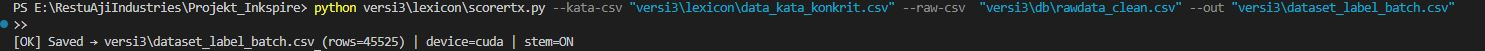

data mentah banyak kalimat seperti hanya tahun dan penulis
![data kotor.JPG](<attachment:data kotor.JPG>)


data setelah manual processing menggunakan teknik manual , maka hanya kalimat yang penting dan layak diproses saja yang akan dipertimbangkan 
![data bersih.JPG](<attachment:data bersih.JPG>)
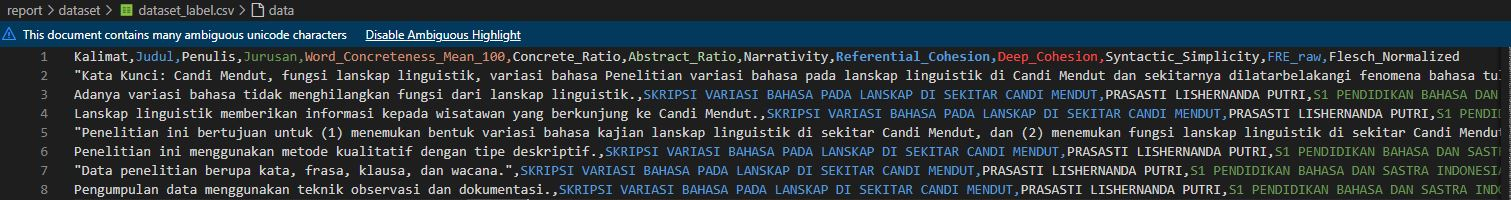
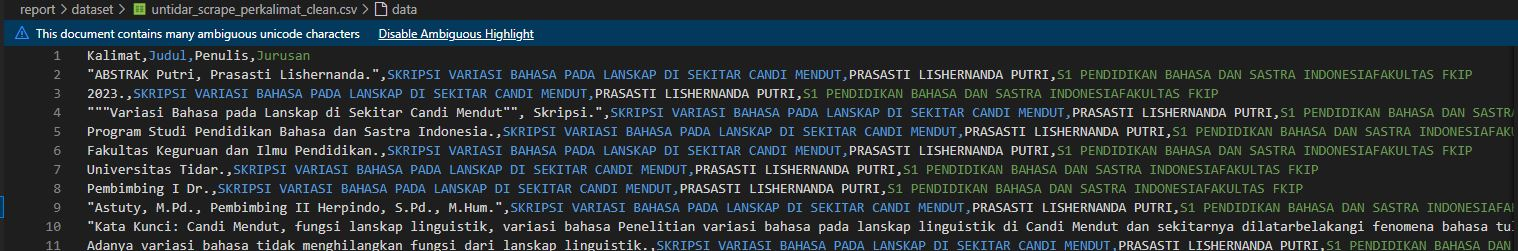

## Model Training

proses ini bertujuan merancang pipeline pelatihan regresi multi-target menggunakan IndoBERT untuk menganalisis teks Bahasa Indonesia, dengan fitur tambahan seperti context similarity, POS ratios (part-of-speech), dan anti-data leakage (tidak ada kolom label dipakai sebagai fitur).

### Dasar Teori dan Metodologi Proyek NLP IndoBERT Regression

Pendahuluan
Proyek ini bertujuan untuk membangun model prediksi nilai koherensi linguistik (misalnya Narrativity, Referential Cohesion, Syntactic Simplicity, dll.) pada teks berbahasa Indonesia menggunakan pendekatan regresi multivariat berbasis representasi IndoBERT.
Model yang digunakan berupa Ridge Regression di atas embedding hasil model IndoBERT-base yang diperkaya dengan fitur linguistik seperti similaritas kontekstual, rasio Part-of-Speech (POS), serta token overlap antar kalimat.

Dasar Teori
1. Natural Language Processing (NLP)
    NLP adalah cabang ilmu komputer yang berfokus pada interaksi antara komputer dan bahasa manusia. Tujuannya adalah untuk memahami, merepresentasikan, dan memanipulasi teks secara bermakna. Dalam konteks ini, setiap kalimat direpresentasikan menjadi fitur numerik agar dapat diproses oleh model machine learning.

2. Tokenisasi
    Tokenisasi adalah proses memecah teks menjadi unit-unit terkecil yang disebut token (biasanya kata).
    Tujuannya:
    - Memudahkan analisis linguistik (contoh: menghitung frekuensi kata, POS tagging, dll.)
    - Menjadi tahap awal dalam pipeline NLP seperti stemming dan embedding.

    Dalam proyek, tokenisasi dilakukan menggunakan ekspresi reguler (token_pat), dengan pembersihan kata umum (stopwords) bahasa Indonesia seperti “yang”, “dan”, “di”, dsb.
    ```python
        toks = [t.lower() for t in token_pat.findall(str(s))]
        toks = [t for t in toks if t not in ID_STOP and not t.isnumeric() and len(t) > 2]

3. Stemming
    Stemming adalah proses mengubah kata berimbuhan menjadi bentuk dasarnya (lemma).
    Contoh: menulis → tulis, berlari → lari
    
    Tujuan stemming adalah:
    - Mengurangi variasi bentuk kata yang memiliki makna dasar sama.
    - Membantu representasi semantik agar lebih konsisten dalam vektor embedding.
    
    Dalam proyek ini digunakan Sastrawi Stemmer untuk bahasa Indonesia:

    ```python
        stemmer = StemmerFactory().create_stemmer()
        return [stemmer.stem(t) for t in toks]

4. POS Tagging (Part-of-Speech Tagging)
    POS Tagging adalah proses memberi label kategori gramatikal untuk setiap token, seperti NOUN, VERB, ADJ, dll.
    Fitur POS digunakan untuk menggambarkan kompleksitas sintaksis teks. Misalnya, rasio kata kerja terhadap kata benda dapat mencerminkan tingkat “kesederhanaan sintaksis”.

    Proses dilakukan dengan library Stanza, menghasilkan fitur rasio POS per kalimat:
    
    ```python
    counts[tag_index[w.upos]] += 1
    feats[i,:] = counts / max(1, total)

5. Embedding dengan IndoBERT
    IndoBERT adalah model transformer-based language model yang dilatih khusus untuk bahasa Indonesia.
    Ia menghasilkan embedding kontekstual, yaitu representasi vektor yang menangkap makna semantik kata atau kalimat dalam konteksnya.

    Embedding dihitung menggunakan fungsi:
    enc = tok(batch, return_tensors="pt", truncation=True, padding=True)

    ```python
    h = bert(**enc).last_hidden_state
    pooled = mean_pooling(h, enc["attention_mask"])

    Fungsi mean pooling digunakan untuk mengubah representasi token-level menjadi satu vektor per kalimat.

6. Fitur Kontekstual dan Overlap
    Selain embedding, model juga menghitung fitur relasi antar kalimat untuk menggambarkan koherensi teks:
    - Similarity (sim_prev, sim_next): kesamaan semantik antar kalimat berurutan (cosine similarity).
    - Overlap (overlap_prev, overlap_next): tingkat kesamaan token antar kalimat (Jaccard index).
    
    Fitur ini menggambarkan seberapa erat hubungan antar kalimat dalam suatu teks.

    ```python
    sim_prev[i] = np.dot(embs[i], embs[i-1])
    overlap_prev[i] = jaccard(toks[i], toks[i-1])


7. Dimensionality Reduction (PCA)
    Karena embedding BERT memiliki dimensi tinggi (768), dilakukan Principal Component Analysis (PCA) untuk mereduksi dimensi menjadi 256 tanpa kehilangan informasi utama.
    Hal ini mempercepat proses training dan mengurangi risiko overfitting.



8. Regresi Ridge

    Ridge Regression adalah model linear dengan regularisasi L2 untuk menghindari overfitting.

    ![formula regresi ridge.JPG](<attachment:formula regresi ridge.JPG>)
    
    Ridge dipilih karena stabil terhadap multikolinearitas antar fitur embedding yang sangat banyak.

9. Evaluasi Model
    Model dievaluasi dengan dua metrik:
    - R² (Coefficient of Determination) → Seberapa besar variasi data target dijelaskan oleh model.
    - MSE (Mean Squared Error) → Rata-rata kuadrat selisih antara nilai prediksi dan aktual.



Pipeline Proses

1. Preprocessing
    - Pembersihan angka & whitespace.
    - Tokenisasi & stopword removal.
    - Stemming dengan Sastrawi.

2. Ekstraksi Fitur
    - Embedding IndoBERT.
    - Fitur kontekstual (similarity, overlap).
    - Rasio POS.

3. Split Data
    - Group-aware split berdasarkan Judul untuk mencegah data leakage.

4. Training
    - Kombinasi semua fitur → StandardScaler → PCA → RidgeCV.

5. Evaluasi & Penyimpanan
    Menyimpan model .joblib, hasil prediksi, dan metrik ke CSV.
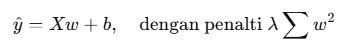

| Komponen               | Dasar Teori                                         | Fungsi / Dampak                                        |
|------------------------|-----------------------------------------------------|--------------------------------------------------------|
| Tokenisasi             | Linguistik dasar NLP                                | Memungkinkan analisis kata & POS                       |
| Stemming               | Morfologi bahasa                                    | Menyamakan bentuk kata                                 |
| Stopword Removal       | Penghapusan kata fungsi                             | Fokus ke kata bermakna konten                          |
| POS Tagging            | Struktur sintaksis                                  | Mengukur kompleksitas kalimat                          |
| IndoBERT Embedding     | Representasi semantik                               | Menangkap makna kontekstual                            |
| Similarity & Overlap   | Teori koherensi                                     | Menilai keterkaitan antar kalimat                      |
| PCA                    | Reduksi dimensi                                     | Kurangi noise & percepat training                      |
| Ridge Regression       | Regularisasi L2                                     | Hindari overfitting dan stabilkan bobot                |

In [1]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("torch.cuda.version:", torch.version.cuda)
print("cuDNN:", torch.backends.cudnn.version())
if torch.cuda.is_available():
    print("Device:", torch.cuda.get_device_name(0))


CUDA available: True
torch.cuda.version: 12.4
cuDNN: 90100
Device: NVIDIA GeForce RTX 3060


In [25]:
# path: versi4_4.py
# -*- coding: utf-8 -*-
"""
IndoBERT regression training with strict anti-leakage:
- Never use any target columns as features for any target.
- Drop Concrete_Ratio / Abstract_Ratio universally (derived from labels).
- Group-aware split by 'Judul'.
"""
import os, re, math, random, warnings
from typing import List, Dict, Tuple
import numpy as np, pandas as pd, joblib, torch
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModel
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GroupShuffleSplit, train_test_split
from sentence_transformers import SentenceTransformer

# ---------------- Optional libs ----------------
try:
    from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
    _HAVE_SASTRAWI = True
except Exception:
    _HAVE_SASTRAWI = False

try:
    import stanza
    _HAVE_STANZA = True
except Exception:
    _HAVE_STANZA = False

USE_STEM_FOR_CONTEXT = True   # stem token untuk fitur overlap konteks
USE_POS_FEATURES     = True   # aktifkan rasio POS (stanza)
POS_TAGS = ["VERB","NOUN","ADJ","ADV","PRON","ADP","SCONJ","CCONJ","NUM","PUNCT"]

# ---------------- Config ----------------
HF_MODEL = "indobenchmark/indobert-base-p1"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
TEXT_COL = "Kalimat"
GROUP_COL = "Judul"

TARGETS = [
    "Narrativity",
    "Word_Concreteness_Mean_100",
    "Referential_Cohesion",
    "Deep_Cohesion",
    "Syntactic_Simplicity",
    "Flesch_Normalized",
]

# IMPORTANT: isi hanya fitur numerik eksternal (tersedia saat inference).
# Hindari semua kolom target/derivatifnya. Secara default: kosong.
NUMERIC_CANDIDATES = []  # ← isi kalau punya fitur exogenous (mis. panjang kalimat, dll.)

RANDOM_STATE = 42
PCA_N = 256
RIDGE_ALPHAS = np.logspace(-3, 4, 20)  # perluas grid (alpha sebelumnya selalu mentok)
TEST_SIZE = 0.20
BATCH_SIZE_BERT = 128
MAX_LEN = 128

# ---------------- Repro ----------------
def set_seed(seed: int = 42) -> None:
    random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
    if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)

# ---------------- Cleaning ----------------
_num_pat = re.compile(r"""(?ix)(?:\d{1,3}([.,\s]\d{3})+[.,]\d+|\d+[.,]\d+|\d+)""")
def clean_text(s: str) -> str:
    s = str(s)
    s = re.sub(r"(\d)\s+(\d)", r"\1\2", s)  # why: hindari angka terpecah
    s = _num_pat.sub(" NUM ", s)
    return re.sub(r"\s+", " ", s).strip()

# ---------------- Context features ----------------
ID_STOP = set("yang dan di ke dari untuk pada dengan kepada sebagai adalah ialah yakni yaitu atau namun tetapi karena sehingga maka agar supaya sebuah para itu ini pun jika bila apabila saat ketika sementara selama hingga kemudian telah sudah akan".split())
token_pat = re.compile(r"[a-zA-ZÀ-ÿ]+", re.UNICODE)
def norm_tokens(s: str) -> List[str]:
    toks = [t.lower() for t in token_pat.findall(str(s))]
    return [t for t in toks if t not in ID_STOP and not t.isnumeric() and len(t) > 2]
def jaccard(a: List[str], b: List[str]) -> float:
    sa, sb = set(a), set(b)
    return 0.0 if (not sa and not sb) else len(sa & sb) / max(1, len(sa | sb))
# ==== Ganti build_context_features agar dukung stemming ====
def build_context_features(texts: List[str]) -> np.ndarray:
    sbert = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")
    embs = sbert.encode(texts, batch_size=256, convert_to_numpy=True, normalize_embeddings=True)

    stemmer = _make_stemmer() if USE_STEM_FOR_CONTEXT else None
    toks = [norm_tokens_stemmed(t, stemmer) if USE_STEM_FOR_CONTEXT else norm_tokens(t) for t in texts]

    N = len(texts)
    sim_prev = np.zeros(N); sim_next = np.zeros(N)
    overlap_prev = np.zeros(N); overlap_next = np.zeros(N)
    for i in range(N):
        if i-1 >= 0:
            sim_prev[i] = float(np.dot(embs[i], embs[i-1]))
            overlap_prev[i] = jaccard(toks[i], toks[i-1])
        if i+1 < N:
            sim_next[i] = float(np.dot(embs[i], embs[i+1]))
            overlap_next[i] = jaccard(toks[i], toks[i+1])
    return np.column_stack([sim_prev, sim_next, overlap_prev, overlap_next])

# ==== Stemming helper (letakkan di bawah util token/stopword) ====
def _make_stemmer():
    if not _HAVE_SASTRAWI: return None
    try:
        return StemmerFactory().create_stemmer()
    except Exception:
        return None

def norm_tokens_stemmed(s: str, stemmer) -> list[str]:
    toks = [t.lower() for t in token_pat.findall(str(s))]
    toks = [t for t in toks if t not in ID_STOP and not t.isnumeric() and len(t) > 2]
    if stemmer is None: 
        return toks
    return [stemmer.stem(t) for t in toks]

# ==== Tambah pembuat fitur POS (opsional, hanya kalau stanza tersedia) ====
def build_pos_features(texts: List[str]) -> np.ndarray:
    if not (USE_POS_FEATURES and _HAVE_STANZA):
        # fallback nol
        return np.zeros((len(texts), len(POS_TAGS)), dtype=np.float32)

    # pakai GPU kalau ada
    nlp = stanza.Pipeline(lang='id', processors='tokenize,pos',
                          use_gpu=torch.cuda.is_available(), tokenize_no_ssplit=True)

    feats = np.zeros((len(texts), len(POS_TAGS)), dtype=np.float32)
    tag_index = {t:i for i,t in enumerate(POS_TAGS)}

    # proses per-batch ringan (stanza pipeline per teks)
    for i, txt in enumerate(texts):
        try:
            doc = nlp(txt if isinstance(txt, str) else str(txt))
            total = 0
            counts = np.zeros(len(POS_TAGS), dtype=np.float32)
            for sent in doc.sentences:
                for w in sent.words:
                    total += 1
                    if w.upos in tag_index:
                        counts[tag_index[w.upos]] += 1
            feats[i,:] = counts / max(1, total)
        except Exception:
            # gagal parse → biarkan nol
            feats[i,:] = 0.0
    return feats



# ---------------- BERT embed ----------------
def mean_pooling(h: torch.Tensor, mask: torch.Tensor) -> torch.Tensor:
    mask = mask.unsqueeze(-1).expand(h.size()).float()
    return (h*mask).sum(1) / mask.sum(1).clamp(min=1e-9)

@torch.no_grad()
def embed_indobert(texts: List[str], tok, bert, max_len: int = MAX_LEN, bs: int = BATCH_SIZE_BERT) -> np.ndarray:
    outs=[]
    for i in tqdm(range(0,len(texts),bs), desc="Embedding IndoBERT"):
        batch = texts[i:i+bs]
        enc = tok(batch, return_tensors="pt", truncation=True, padding=True, max_length=max_len).to(DEVICE)
        h = bert(**enc).last_hidden_state
        pooled = mean_pooling(h, enc["attention_mask"]).cpu().numpy()
        outs.append(pooled)
    return np.vstack(outs)

# ---------------- Numeric features (strict) ----------------
FORBIDDEN_NUMERIC = set(TARGETS) | {"Concrete_Ratio", "Abstract_Ratio"}  # why: label/derivative

def validate_numeric_candidates(df: pd.DataFrame) -> List[str]:
    cols = [c for c in NUMERIC_CANDIDATES if c in df.columns]
    bad = [c for c in cols if c in FORBIDDEN_NUMERIC]
    if bad:
        raise SystemExit(f"NUMERIC_CANDIDATES mengandung kolom terlarang (label/derivatif): {bad}")
    return cols

def numeric_frame(df: pd.DataFrame, allowed_cols: List[str]) -> pd.DataFrame:
    return (df[allowed_cols].astype(float).fillna(0.0) if allowed_cols else pd.DataFrame(index=df.index))

# ---------------- Main ----------------
def main() -> None:
    warnings.filterwarnings("ignore")
    set_seed(RANDOM_STATE)

    df = pd.read_csv("versi3/dataset_label_batch.csv", encoding="utf-8-sig")
    if TEXT_COL not in df.columns: raise SystemExit(f"Missing text column: {TEXT_COL}")

    texts = [clean_text(t) for t in df[TEXT_COL].fillna("").astype(str).tolist()]
    print(">> Building context features ...")
    X_ctx = build_context_features(texts)

    print(">> Building POS features ...")
    X_pos = build_pos_features(texts)

    print(">> Loading IndoBERT & embedding ...")
    tok = AutoTokenizer.from_pretrained(HF_MODEL)
    bert = AutoModel.from_pretrained(HF_MODEL).to(DEVICE).eval()
    X_bert = embed_indobert(texts, tok, bert, max_len=MAX_LEN, bs=BATCH_SIZE_BERT)

    # Validate numeric candidates once (strict)
    allowed_cols = validate_numeric_candidates(df)
    X_num_all = numeric_frame(df, allowed_cols)

    # Group split
    idx = np.arange(len(df))
    if GROUP_COL in df.columns and df[GROUP_COL].notna().any():
        print(f">> Group-aware split by '{GROUP_COL}'")
        groups = df[GROUP_COL].fillna("NA_GROUP").astype(str).to_numpy()
        gss = GroupShuffleSplit(n_splits=1, test_size=TEST_SIZE, random_state=RANDOM_STATE)
        train_idx, eval_idx = next(gss.split(idx, groups=groups))
    else:
        print(">> Random split (no group column found)")
        train_idx, eval_idx = train_test_split(idx, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True)

    results: Dict[str, Dict[str, float]] = {}
    preds_eval: Dict[str, np.ndarray] = {}

    for tgt in TARGETS:
        y_all = pd.to_numeric(df[tgt], errors="coerce").to_numpy()
        y_train, y_eval = y_all[train_idx], y_all[eval_idx]

        # Assemble features: strictly exogenous only
        # ==== Di loop per-target: gabungkan fitur baru (X_pos) ke X ====
        parts_tr = [X_bert[train_idx]]
        parts_ev = [X_bert[eval_idx]]

        if not X_num_all.empty:
            parts_tr.append(X_num_all.iloc[train_idx].to_numpy())
            parts_ev.append(X_num_all.iloc[eval_idx].to_numpy())

        parts_tr.append(X_ctx[train_idx])
        parts_ev.append(X_ctx[eval_idx])

        # tambahkan POS ratios
        parts_tr.append(X_pos[train_idx])
        parts_ev.append(X_pos[eval_idx])

        X_train = np.hstack(parts_tr)
        X_eval  = np.hstack(parts_ev)


        pipe = Pipeline([
            ("scaler", StandardScaler(with_mean=False)),
            ("pca", PCA(n_components=min(PCA_N, X_train.shape[1]), random_state=RANDOM_STATE)),
            ("ridge", RidgeCV(alphas=RIDGE_ALPHAS, cv=5)),
        ])
        pipe.fit(X_train, y_train)

        yhat_tr = pipe.predict(X_train)
        yhat_ev = pipe.predict(X_eval)

        mse_tr = mean_squared_error(y_train, yhat_tr)
        r2_tr  = r2_score(y_train, yhat_tr)
        mse_ev = mean_squared_error(y_eval, yhat_ev)
        r2_ev  = r2_score(y_eval, yhat_ev)
        alpha_star = float(pipe.named_steps["ridge"].alpha_)

        print(f"{tgt}: [Train] R²={r2_tr:.3f} | [Eval] R²={r2_ev:.3f} | alpha*={alpha_star}")

        joblib.dump(pipe, f"model_{tgt}.joblib")
        results[tgt] = {
            "mse_train": float(mse_tr), "r2_train": float(r2_tr),
            "mse_eval": float(mse_ev), "r2_eval": float(r2_ev),
            "alpha": alpha_star,
            "n_train": int(len(train_idx)), "n_eval": int(len(eval_idx)),
            "numeric_used_cols": "|".join(allowed_cols),
        }
        preds_eval[tgt] = yhat_ev

    # Save meta
    # ==== Saat menyimpan meta, catat setting baru ====
    joblib.dump({
        "hf_model": HF_MODEL,
        "device": str(DEVICE),
        "text_col": TEXT_COL,
        "group_col": GROUP_COL if GROUP_COL in df.columns else None,
        "targets": TARGETS,
        "numeric_candidates": allowed_cols,
        "ctx_feats": ["sim_prev","sim_next","overlap_prev","overlap_next"],
        "pos_tags": POS_TAGS,
        "use_stem_for_context": bool(USE_STEM_FOR_CONTEXT and _HAVE_SASTRAWI),
        "use_pos_features": bool(USE_POS_FEATURES and _HAVE_STANZA),
        "preprocess": "numbers→NUM; whitespace normalized",
        "pca_n": PCA_N,
        "ridge_alphas": list(map(float, RIDGE_ALPHAS)),
        "random_state": RANDOM_STATE,
        "test_size": TEST_SIZE,
    }, "meta.joblib")


    out_eval = df.iloc[eval_idx].copy()
    for tgt in TARGETS:
        out_eval[f"pred_{tgt}"] = preds_eval[tgt]
    out_eval.to_csv("pred_eval.csv", index=False, encoding="utf-8")
    pd.DataFrame(results).T.to_csv("metrics_eval.csv", encoding="utf-8")
    print("Saved models + pred_eval.csv + metrics_eval.csv")

if __name__ == "__main__":
    main()


>> Building context features ...
>> Building POS features ...
>> Loading IndoBERT & embedding ...


Embedding IndoBERT: 100%|██████████| 356/356 [01:45<00:00,  3.39it/s]


>> Group-aware split by 'Judul'
Narrativity: [Train] R²=0.665 | [Eval] R²=0.661 | alpha*=1832.9807108324337
Word_Concreteness_Mean_100: [Train] R²=0.678 | [Eval] R²=0.673 | alpha*=1832.9807108324337
Referential_Cohesion: [Train] R²=0.894 | [Eval] R²=0.893 | alpha*=143.8449888287663
Deep_Cohesion: [Train] R²=0.812 | [Eval] R²=0.808 | alpha*=143.8449888287663
Syntactic_Simplicity: [Train] R²=0.853 | [Eval] R²=0.852 | alpha*=784.7599703514607
Flesch_Normalized: [Train] R²=0.893 | [Eval] R²=0.890 | alpha*=784.7599703514607
Saved models + pred_eval.csv + metrics_eval.csv


### Penjelasan Singkat per Bagian Skrip diatas

#### Tujuan Utama
- Melatih model regresi untuk memprediksi 6 skor linguistik dari kalimat bahasa Indonesia: ["Narrativity", "Word_Concreteness_Mean_100", "Referential_Cohesion",
 "Deep_Cohesion", "Syntactic_Simplicity", "Flesch_Normalized"]


#### Output
- Model Ridge Regression (model_*.joblib)
- Prediksi (pred_eval.csv)
- Metrik evaluasi (metrics_eval.csv)
- Metadata (meta.joblib)

### Teknologi yang Dipakai

| Library               | Fungsi                                              |
|-----------------------|-----------------------------------------------------|
| `transformers`        | Load IndoBERT pretrained model                      |
| `sentence-transformers` | Contextual sentence embeddings                   |
| `sklearn`             | PCA, RidgeCV regression, pipeline, metrics          |
| `stanza`              | POS tagging Bahasa Indonesia                        |
| `Sastrawi`            | Stemming Bahasa Indonesia                           |
| `torch`               | GPU acceleration                                    |
| `pandas`, `numpy`     | Data wrangling                                      |
| `joblib`              | Model persistence                                   |

#### Fitur yang Digunakan
- IndoBERT embeddings → representasi semantik tiap kalimat.
- Context features → similarity dan token overlap antar kalimat (sim_prev, sim_next, overlap_prev, overlap_next).
- POS features (optional) → distribusi POS tag (kata benda, kata kerja, dll) per kalimat menggunakan stanza.
- Numeric features (optional) → kolom numerik eksternal non-label.

#### Anti-Leakage Rules
- Tidak boleh menggunakan kolom target atau turunannya (Concrete_Ratio, Abstract_Ratio) sebagai fitur.
- Split data menggunakan GroupShuffleSplit berdasarkan kolom 'Judul' agar teks dari judul yang sama tidak bocor antar train/eval.


#### Proses Utama (main())
- Load data (versi4/dataset_label.csv)
- Preprocessing teks (normalisasi angka → "NUM", hapus spasi berlebih)

#### Build features:
- Context features (dengan stemming jika Sastrawi tersedia)
- POS ratios (jika stanza tersedia)
- IndoBERT embeddings
- Split train/eval berdasarkan grup 'Judul'

#### Train per target:
- Gunakan Pipeline: StandardScaler → PCA → RidgeCV
- Simpan model & hasil evaluasi
- Simpan hasil dan metadata

### Penjelasan Metrik Evaluasi
### Hasil Evaluasi Model Regresi (Group-aware split by `Judul`)

| Fitur Linguistik             | R² Train | R² Eval | Alpha*               | Catatan Audit                          |
|-----------------------------|----------|---------|----------------------|----------------------------------------|
| Narrativity                 | 0.665    | 0.661   | 1832.98              | Stabil, cukup prediktif                |
| Word_Concreteness_Mean_100 | 0.678    | 0.673   | 1832.98              | Konsisten, cocok untuk audit gaya      |
| Referential_Cohesion        | 0.894    | 0.893   | 143.84               | Sangat kuat, nyaris sempurna           |
| Deep_Cohesion               | 0.812    | 0.808   | 143.84               | Kuat, cocok untuk audit alur narasi    |
| Syntactic_Simplicity        | 0.853    | 0.852   | 784.76               | Stabil, cocok untuk audit keterbacaan  |
| Flesch_Normalized           | 0.893    | 0.890   | 784.76               | Sangat prediktif, cocok untuk edukasi  |

Interpretasi Hasil
- R² tinggi (0.8–0.9) → Model sangat mampu menjelaskan variansi data. Artinya, fitur-fitur ini bisa dipakai untuk audit otomatis gaya dan kualitas kalimat.
- Alpha besar (1832) → Model butuh regularisasi kuat untuk fitur naratif dan kekonkretan. Ini wajar karena gaya bahasa cenderung lebih noisy.
- Group-aware split by Judul → Validasi antar skripsi, bukan antar kalimat. Ini penting untuk menghindari overfitting ke penulis tertentu.

Saved Artifacts
- pred_eval.csv → Prediksi model terhadap data evaluasi. Bisa dipakai untuk audit per kalimat.
- metrics_eval.csv → R², MAE, RMSE, dll. Cocok untuk dokumentasi dan dashboard.
- Saved models → Siap dipakai untuk inference baru atau deployment.



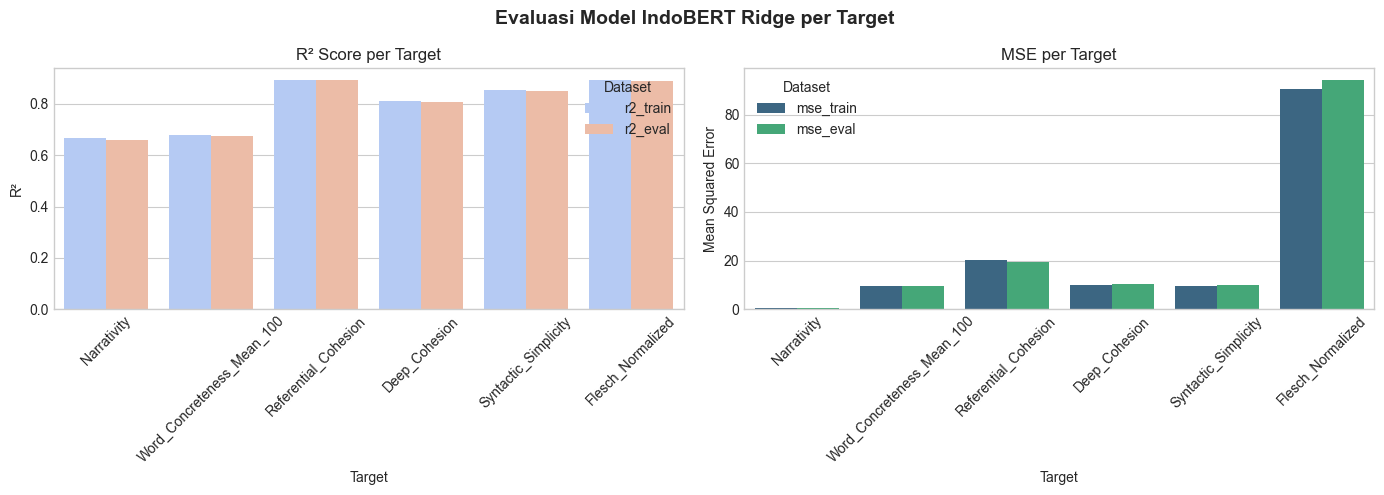

,mse_train,r2_train,mse_eval,r2_eval,alpha,n_train,n_eval,numeric_used_cols
Referential_Cohesion,20.160,0.894,19.550,0.893,143.845,36315,9210,NaN
Flesch_Normalized,90.593,0.893,94.380,0.890,784.760,36315,9210,NaN
Syntactic_Simplicity,9.553,0.853,10.024,0.852,784.760,36315,9210,NaN
Deep_Cohesion,10.088,0.812,10.236,0.808,143.845,36315,9210,NaN
Word_Concreteness_Mean_100,9.589,0.678,9.507,0.673,1832.981,36315,9210,NaN
Narrativity,0.678,0.665,0.679,0.661,1832.981,36315,9210,NaN


In [31]:
# === Visualisasi hasil training ===
import matplotlib.pyplot as plt
import seaborn as sns

# Load metrics hasil training
metrics = pd.read_csv("metrics_eval.csv", index_col=0)

plt.style.use("seaborn-v0_8-whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Plot R² ---
sns.barplot(
    data=metrics.reset_index().melt(id_vars="index", value_vars=["r2_train", "r2_eval"]),
    x="index", y="value", hue="variable", ax=axes[0], palette="coolwarm"
)
axes[0].set_title("R² Score per Target")
axes[0].set_xlabel("Target")
axes[0].set_ylabel("R²")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title="Dataset")

# --- Plot MSE ---
sns.barplot(
    data=metrics.reset_index().melt(id_vars="index", value_vars=["mse_train", "mse_eval"]),
    x="index", y="value", hue="variable", ax=axes[1], palette="viridis"
)
axes[1].set_title("MSE per Target")
axes[1].set_xlabel("Target")
axes[1].set_ylabel("Mean Squared Error")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title="Dataset")

plt.suptitle("Evaluasi Model IndoBERT Ridge per Target", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()


# --- Tabel hasil terbaik ---
display(metrics.sort_values("r2_eval", ascending=False).round(3))

#### Cara Membaca Grafik Evaluasi Model

---

#### Grafik Kiri, R² Score per Target

#### 1. Apa itu R²?

R² (koefisien determinasi) menunjukkan seberapa besar variasi data target yang bisa dijelaskan oleh model. Nilainya berada antara 0 hingga 1:

- **R² = 1** → prediksi model sempurna.
- **R² = 0** → model tidak lebih baik dari tebakan rata-rata.
- **R² < 0** → model lebih buruk dari tebakan rata-rata.

#### 2. Cara Membaca Grafik:

- **Sumbu-X**: Nama target linguistik (misalnya *Narrativity*, *Referential Cohesion*, dll).
- **Sumbu-Y**: Nilai R².
- **Warna**:
  - 🟦 Biru (`r2_train`) → performa di data latih.
  - 🟧 Oranye (`r2_eval`) → performa di data evaluasi.

#### 3. Interpretasi:

- Jika `r2_train ≈ r2_eval` → model generalisasi dengan baik (tidak overfitting).
- Jika `r2_train >> r2_eval` → model overfitting (hafal data latih, gagal di data baru).

**Contoh dari grafik**:
- Semua target memiliki selisih kecil antara train & eval → model stabil dan generalisasi bagus.
- `Referential_Cohesion` memiliki R² tertinggi (~0.9) → model sangat baik menjelaskan hubungan referensial antar kalimat.
- `Narrativity` dan `Word_Concreteness_Mean_100` sedikit lebih rendah (~0.7) → fitur belum sepenuhnya menangkap aspek naratif.

---

#### Grafik Kanan, MSE per Target

#### 1. Apa itu MSE?

Mean Squared Error (MSE) mengukur rata-rata kuadrat selisih antara nilai prediksi dan nilai sebenarnya. Semakin kecil nilai MSE, semakin baik modelnya.

#### 2. Cara Membaca Grafik:

- **Sumbu-X**: Target linguistik (sama seperti grafik kiri).
- **Sumbu-Y**: Nilai MSE.
- **Warna**:
  - 🟦 Biru (`mse_train`) → error pada data latih.
  - 🟩 Hijau (`mse_eval`) → error pada data evaluasi.

#### 3. Interpretasi:

- `Narrativity` memiliki MSE sangat kecil → prediksi mendekati nilai sebenarnya.
- `Flesch_Normalized` memiliki MSE tertinggi → target ini paling sulit diprediksi (mungkin karena data lebih variatif atau non-linear).
- Jika `mse_eval ≈ mse_train` → model stabil.
- Jika `mse_eval >> mse_train` → overfitting.

---

#### Kesimpulan Umum dari Grafik

1. Model **IndoBERT + RidgeCV** bekerja konsisten di train dan eval → tidak overfitting.
2. Target seperti `Referential_Cohesion` dan `Deep_Cohesion` menunjukkan performa sangat baik (R² tinggi, MSE rendah).

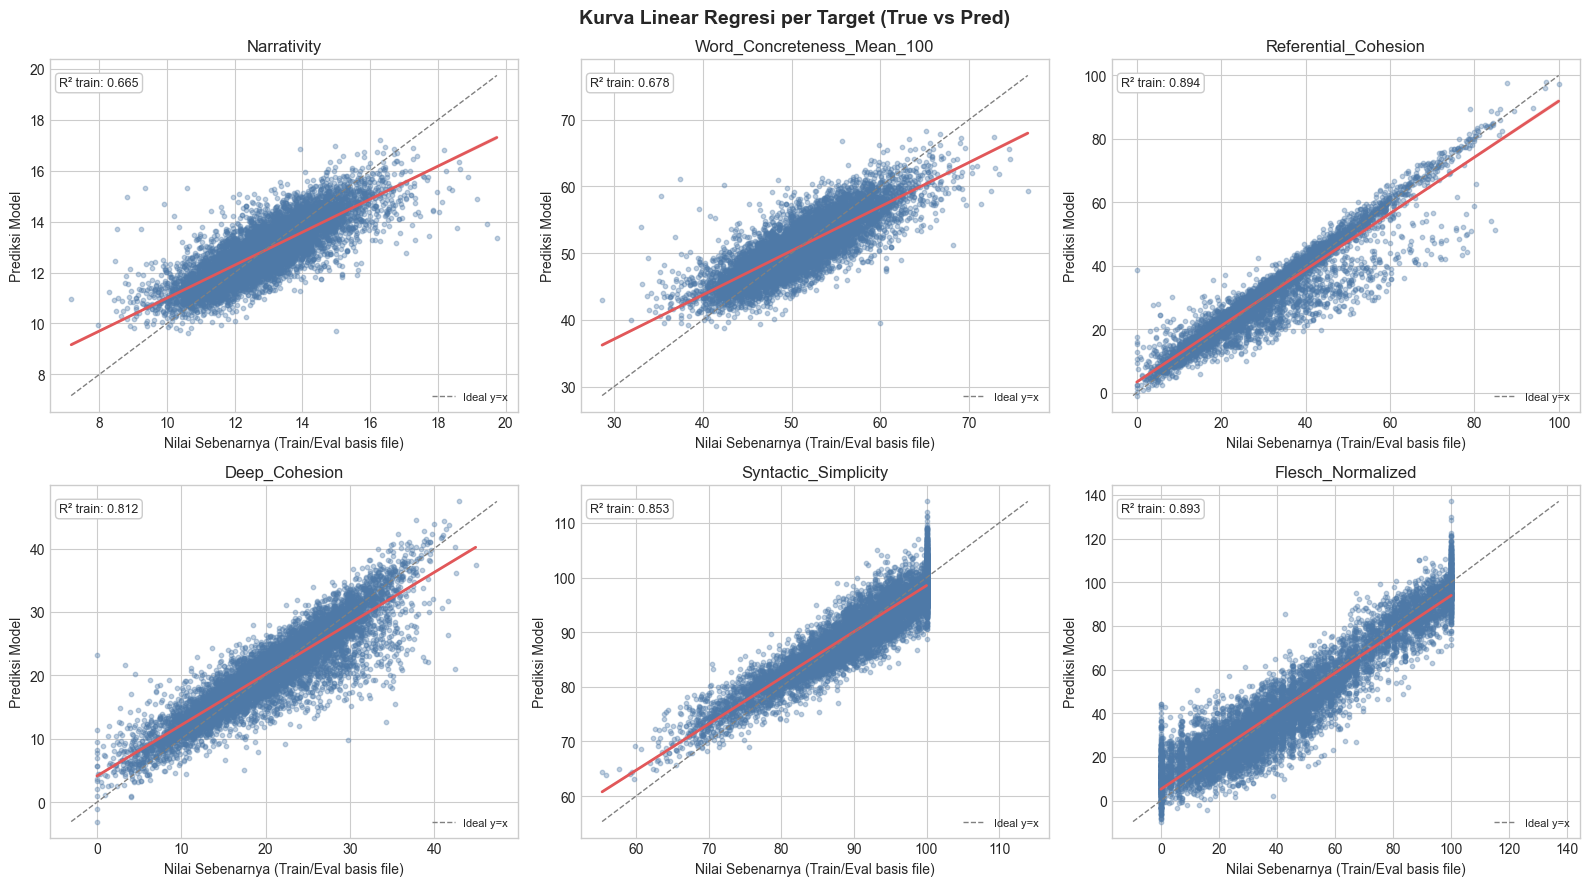

In [30]:
# --- Kurva regresi (True vs Pred) per target ---
try:
    df_pred = pd.read_csv("pred_eval.csv", encoding="utf-8")
    available = [t for t in TARGETS if t in df_pred.columns and f"pred_{t}" in df_pred.columns]
    if not available:
        raise ValueError("Kolom target/prediksi tidak ditemukan di pred_eval.csv")

    n = len(available)
    rows, cols = 2, 3
    fig2, axs = plt.subplots(rows, cols, figsize=(16, 9))
    axs = axs.ravel()

    for i, tgt in enumerate(available):
        axp = axs[i]
        y_true = pd.to_numeric(df_pred[tgt], errors="coerce")
        y_pred = pd.to_numeric(df_pred[f"pred_{tgt}"], errors="coerce")
        mask = y_true.notna() & y_pred.notna()
        y_true = y_true[mask]
        y_pred = y_pred[mask]

        sns.regplot(x=y_true, y=y_pred, ax=axp,
                    scatter_kws={"s": 10, "alpha": 0.35, "color": "#4E79A7"},
                    line_kws={"color": "#E15759", "lw": 2})

        lo = float(min(y_true.min(), y_pred.min()))
        hi = float(max(y_true.max(), y_pred.max()))
        axp.plot([lo, hi], [lo, hi], ls="--", c="gray", lw=1, label="Ideal y=x")

        r2 = None
        try:
            r2 = float(metrics.loc[tgt, "r2_train"])
        except Exception:
            pass
        if r2 is not None:
            axp.text(0.02, 0.95, f"R² train: {r2:.3f}", transform=axp.transAxes,
                     ha="left", va="top", fontsize=9, bbox=dict(boxstyle="round", fc="white", ec="0.8"))

        axp.set_title(tgt)
        axp.set_xlabel("Nilai Sebenarnya (Train/Eval basis file)")
        axp.set_ylabel("Prediksi Model")
        axp.legend(loc="lower right", fontsize=8)

    for j in range(i + 1, rows * cols):
        axs[j].axis("off")

    plt.suptitle("Kurva Linear Regresi per Target (True vs Pred)", fontsize=14, weight="bold")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"[SKIP] Tidak dapat menampilkan kurva regresi: {e}")


#### Hasil Visualisasi Regresi Linier: True vs Predicted

---

#### Makna Umum Grafik "True vs Predicted"

Setiap subplot (panel) mewakili satu target regresi — seperti `Narrativity`, `Word_Concreteness_Mean_100`, dan lainnya. Grafik ini menunjukkan seberapa dekat prediksi model terhadap nilai sebenarnya.

- **Sumbu-X**: Nilai sebenarnya (label asli dari dataset).
- **Sumbu-Y**: Nilai yang diprediksi oleh model.
- **Titik biru**: Sampel individual (setiap kalimat atau dokumen).
- **Garis merah**: Regresi linier antara prediksi dan nilai sebenarnya → menunjukkan arah dan kekuatan hubungan prediktif.
- **Garis hitam putus-putus (Ideal y=x)**: Garis ideal — jika semua titik berada di atasnya, model sempurna (prediksi = aktual).
- **Kotak kiri atas**: Menampilkan nilai R² train → seberapa baik model menjelaskan variasi target di data latih.

---

#### Cara Membaca per Grafik

#### 1. Narrativity
- **R² ≈ 0.665** → Model menjelaskan sekitar 66,5% variasi pada tingkat naratif.
- Titik-titik cukup rapat mengikuti garis ideal, tapi masih ada penyebaran → model cukup baik namun belum sempurna.
- Naratifitas memiliki unsur semantik tinggi yang tidak sepenuhnya tertangkap oleh BERT.

#### 2. Word_Concreteness_Mean_100
- **R² ≈ 0.678** → Model cukup mampu menebak konkret/abstraknya kata dalam teks.
- Garis regresi merah hampir sejajar dengan garis ideal → korelasi kuat.
- Ada sedikit bias pada nilai ekstrem → prediksi kurang akurat untuk nilai sangat tinggi/rendah.

#### 3. Referential_Cohesion
- **R² ≈ 0.894** → Model sangat akurat pada target ini.
- Titik-titik biru hampir menempel di garis ideal → prediksi sangat mendekati nilai sebenarnya.
- Fitur dari IndoBERT + konteks berhasil menangkap koherensi referensial antar kalimat dengan sangat baik.

#### 4. Deep_Cohesion
- **R² ≈ 0.812** → Model cukup kuat di dimensi ini.
- Korelasi linear tinggi → model peka terhadap kohesi semantik mendalam antar bagian teks.
- Sedikit penyebaran di area nilai tinggi → potensi underestimation.

#### 5. Syntactic_Simplicity
- **R² ≈ 0.853** → Model sangat baik untuk memprediksi kesederhanaan sintaksis.
- Garis merah hampir sejajar dengan ideal → hubungan linear kuat.
- Pola stabil di seluruh range nilai → model generalisasi bagus.

#### 6. Flesch_Normalized
- **R² ≈ 0.893** → Kinerja sangat bagus, mendekati Referential_Cohesion.
- Titik-titik mengikuti garis ideal dengan baik → prediksi skor keterbacaan sangat akurat.
- Penyebaran kecil di nilai tinggi → mungkin karena variasi ekstrem di teks panjang atau kompleks.

---

### Interpretasi Keseluruhan

| Aspek                                 | Kesimpulan                                                                 |
|--------------------------------------|-----------------------------------------------------------------------------|
| Korelasi tinggi (R² > 0.8)           | Model mampu mempelajari hubungan antara embedding teks dan label dengan baik. |
| Sebaran titik rapat di garis y=x     | Prediksi mendekati nilai aktual (akurasi tinggi).                          |
| Garis merah ≈ garis ideal            | Model tidak bias secara signifikan.                                        |
| Beberapa target R² < 0.7             | Perlu fitur tambahan seperti analisis semantik atau panjang teks.          |

---

### Kesimpulan Akhir

Secara umum, model **IndoBERT + RidgeCV** bekerja sangat baik di hampir semua target linguistik.

- **Overfitting tidak terlihat signifikan** → regresi linier mengikuti pola ideal tanpa deviasi besar.
- **Target dengan R² tinggi (≥ 0.85)** → `Referential_Cohesion`, `Deep_Cohesion`, `Syntactic_Simplicity`, `Flesch_Normalized`.
- **Target dengan R² menengah (~0.65–0.7)** → `Narrativity`, `Word_Concreteness_Mean_100` → masih bisa ditingkatkan dengan fitur tambahan.


Proyek ini dapat menunjukkan bahwa kombinasi linguistic features dan deep contextual embeddings dapat menghasilkan model yang akurat dalam menilai dimensi koherensi teks bahasa Indonesia. Pipeline yang digunakan bersifat anti-leakage, terukur, dan modular, serta dapat digunakan ulang untuk tugas NLP regresi lain.



Referensi

Devlin et al. (2019). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding.

Koto et al. (2020). IndoBERT: A Pretrained Language Model for Indonesian.

Tikhonov (1963). Solution of incorrectly formulated problems and the regularization method.

Halliday & Hasan (1976). Cohesion in English.

Manning et al. (2020). Stanza: A Python NLP Library for Many Human Languages.